In [1]:
!pip install biopython pandas seqlogo

In [2]:
!pip install venn

In [3]:
!pip install seaborn

In [4]:
!pip install upsetplot

In [5]:
# import necessary libraries
import pandas as pd
import numpy as np
import os
import glob
import re
import seqlogo
import seaborn as sns
import math
import matplotlib.pyplot as plt
from upsetplot import plot

## Import all predictions data

In [6]:
# use glob to get all the csv files in the folder
path = "/home/ubuntu/data/task2"
csv_files = glob.glob(os.path.join(path, "*.csv"))

In [7]:
csv_files

['/home/ubuntu/data/task2/pred_Hct116_replicate3_run4.csv',
 '/home/ubuntu/data/task2/pred_K562_replicate6_run1.csv',
 '/home/ubuntu/data/task2/pred_A549_replicate5_run1.csv',
 '/home/ubuntu/data/task2/pred_Hct116_replicate4_run3.csv',
 '/home/ubuntu/data/task2/pred_K562_replicate4_run1.csv',
 '/home/ubuntu/data/task2/pred_HepG2_replicate6_run1.csv',
 '/home/ubuntu/data/task2/pred_K562_replicate5_run1.csv',
 '/home/ubuntu/data/task2/pred_MCF7_replicate4_run1.csv',
 '/home/ubuntu/data/task2/pred_HepG2_replicate5_run2.csv',
 '/home/ubuntu/data/task2/pred_MCF7_replicate3_run1.csv',
 '/home/ubuntu/data/task2/pred_A549_replicate6_run1.csv',
 '/home/ubuntu/data/task2/pred_Hct116_replicate3_run1.csv']

In [8]:
names = []
for i in range(len(csv_files)):
    name = csv_files[i].split("pred_", 1)[1].split(".csv")[0]
    names.append(name)

In [9]:
names

['Hct116_replicate3_run4',
 'K562_replicate6_run1',
 'A549_replicate5_run1',
 'Hct116_replicate4_run3',
 'K562_replicate4_run1',
 'HepG2_replicate6_run1',
 'K562_replicate5_run1',
 'MCF7_replicate4_run1',
 'HepG2_replicate5_run2',
 'MCF7_replicate3_run1',
 'A549_replicate6_run1',
 'Hct116_replicate3_run1']

In [10]:
for i in range(len(names)):
    print(i)
    vars()[names[i]] = pd.read_csv(csv_files[i])

0
1
2
3
4
5
6
7
8
9
10
11


In [11]:
for i in range(len(names)):
    print(names[i], " unique tid: ", len(vars()[names[i]]['transcript_id'].unique()))

Hct116_replicate3_run4  unique tid:  39963
K562_replicate6_run1  unique tid:  36412
A549_replicate5_run1  unique tid:  30758
Hct116_replicate4_run3  unique tid:  46015
K562_replicate4_run1  unique tid:  38801
HepG2_replicate6_run1  unique tid:  42529
K562_replicate5_run1  unique tid:  37586
MCF7_replicate4_run1  unique tid:  43486
HepG2_replicate5_run2  unique tid:  44803
MCF7_replicate3_run1  unique tid:  43486
A549_replicate6_run1  unique tid:  43161
Hct116_replicate3_run1  unique tid:  39378


In [12]:
for i in range(len(names)):
    print(len(np.unique(vars()[names[i]]['transcript_id'])))

39963
36412
30758
46015
38801
42529
37586
43486
44803
43486
43161
39378


In [13]:
from IPython.display import display 
for i in range(len(names)):
    display(vars()[names[i]].head())

,transcript_id,transcript_position,score,sevenmers,dwelling_time_1_min,dwelling_time_1_max,dwelling_time_1_median,dwelling_time_1_std,sd_current_1_min,sd_current_1_max,...,order_2_T,order_3_A,order_3_G,order_6_A,order_6_C,order_6_T,order_7_A,order_7_C,order_7_G,order_7_T
0,ENST00000000233,244,0.152321,AAGACCA,0.00199,0.031836,0.006310,0.005460,1.558000,13.459000,...,0,0,1,0,1,0,1,0,0,0
1,ENST00000000233,261,0.196051,CAAACTG,0.00232,0.027220,0.005980,0.004760,0.876000,11.312000,...,0,1,0,0,0,1,0,0,1,0
2,ENST00000000233,316,0.139140,GAAACAG,0.00232,0.028880,0.006684,0.005036,1.097577,10.010000,...,0,1,0,1,0,0,0,0,1,0
3,ENST00000000233,332,0.200000,AGAACAT,0.00232,0.041499,0.008671,0.006872,1.713000,85.577923,...,0,1,0,1,0,0,0,0,0,1
4,ENST00000000233,368,0.228442,AGGACAA,0.00232,0.041830,0.008960,0.006826,1.725000,9.371068,...,0,0,1,1,0,0,1,0,0,0


,transcript_id,transcript_position,score,sevenmers,dwelling_time_1_min,dwelling_time_1_max,dwelling_time_1_median,dwelling_time_1_std,sd_current_1_min,sd_current_1_max,...,order_2_T,order_3_A,order_3_G,order_6_A,order_6_C,order_6_T,order_7_A,order_7_C,order_7_G,order_7_T
0,ENST00000000233,244,0.187389,AAGACCA,0.00232,0.029880,0.006310,0.006922,0.817000,13.188,...,0,0,1,0,1,0,1,0,0,0
1,ENST00000000233,261,0.266315,CAAACTG,0.00232,0.022240,0.006062,0.003873,0.876000,8.424,...,0,1,0,0,0,1,0,0,1,0
2,ENST00000000233,316,0.125112,GAAACAG,0.00299,0.025597,0.007640,0.004457,1.318789,11.431,...,0,1,0,1,0,0,0,0,1,0
3,ENST00000000233,332,0.179804,AGAACAT,0.00232,0.036044,0.009432,0.005366,2.985827,13.774,...,0,1,0,1,0,0,0,0,0,1
4,ENST00000000233,368,0.182041,AGGACAA,0.00232,0.038840,0.007300,0.007613,1.686000,10.218,...,0,0,1,1,0,0,1,0,0,0


,transcript_id,transcript_position,score,sevenmers,dwelling_time_1_min,dwelling_time_1_max,dwelling_time_1_median,dwelling_time_1_std,sd_current_1_min,sd_current_1_max,...,order_2_T,order_3_A,order_3_G,order_6_A,order_6_C,order_6_T,order_7_A,order_7_C,order_7_G,order_7_T
0,ENST00000000233,244,0.244659,AAGACCA,0.00232,0.022240,0.005757,0.005098,1.461000,8.831364,...,0,0,1,0,1,0,1,0,0,0
1,ENST00000000233,261,0.272040,CAAACTG,0.00232,0.017930,0.004980,0.003660,1.171000,15.760000,...,0,1,0,0,0,1,0,0,1,0
2,ENST00000000233,316,0.139140,GAAACAG,0.00199,0.018384,0.006532,0.003443,1.115000,6.869333,...,0,1,0,1,0,0,0,0,1,0
3,ENST00000000233,332,0.166292,AGAACAT,0.00299,0.039627,0.008295,0.006197,3.598185,11.070373,...,0,1,0,1,0,0,0,0,0,1
4,ENST00000000233,368,0.186927,AGGACAA,0.00232,0.030540,0.008630,0.006706,1.700000,8.942000,...,0,0,1,1,0,0,1,0,0,0


,transcript_id,transcript_position,score,sevenmers,dwelling_time_1_min,dwelling_time_1_max,dwelling_time_1_median,dwelling_time_1_std,sd_current_1_min,sd_current_1_max,...,order_2_T,order_3_A,order_3_G,order_6_A,order_6_C,order_6_T,order_7_A,order_7_C,order_7_G,order_7_T
0,ENST00000000233,244,0.119308,AAGACCA,0.00199,0.02789,0.006640,0.004937,0.902,12.552103,...,0,0,1,0,1,0,1,0,0,0
1,ENST00000000233,261,0.256402,CAAACTG,0.00199,0.03054,0.005980,0.004413,0.864,11.306000,...,0,1,0,0,0,1,0,0,1,0
2,ENST00000000233,316,0.147611,GAAACAG,0.00166,0.02623,0.007242,0.004373,1.149,10.592000,...,0,1,0,1,0,0,0,0,1,0
3,ENST00000000233,332,0.183828,AGAACAT,0.00232,0.03810,0.009492,0.006311,1.262,11.722000,...,0,1,0,1,0,0,0,0,0,1
4,ENST00000000233,368,0.172992,AGGACAA,0.00166,0.04748,0.008895,0.007480,1.590,11.365000,...,0,0,1,1,0,0,1,0,0,0


,transcript_id,transcript_position,score,sevenmers,dwelling_time_1_min,dwelling_time_1_max,dwelling_time_1_median,dwelling_time_1_std,sd_current_1_min,sd_current_1_max,...,order_2_T,order_3_A,order_3_G,order_6_A,order_6_C,order_6_T,order_7_A,order_7_C,order_7_G,order_7_T
0,ENST00000000233,244,0.143548,AAGACCA,0.00232,0.029220,0.006640,0.004788,2.009,17.088000,...,0,0,1,0,1,0,1,0,0,0
1,ENST00000000233,261,0.191456,CAAACTG,0.00232,0.020920,0.005980,0.003879,0.441,16.053000,...,0,1,0,0,0,1,0,0,1,0
2,ENST00000000233,316,0.125806,GAAACAG,0.00232,0.025900,0.006899,0.004398,1.030,12.539000,...,0,1,0,1,0,0,0,0,1,0
3,ENST00000000233,332,0.186667,AGAACAT,0.00232,0.030521,0.008518,0.005643,1.770,16.720000,...,0,1,0,1,0,0,0,0,0,1
4,ENST00000000233,368,0.195325,AGGACAA,0.00166,0.035520,0.008850,0.006060,3.020,8.215135,...,0,0,1,1,0,0,1,0,0,0


,transcript_id,transcript_position,score,sevenmers,dwelling_time_1_min,dwelling_time_1_max,dwelling_time_1_median,dwelling_time_1_std,sd_current_1_min,sd_current_1_max,...,order_2_T,order_3_A,order_3_G,order_6_A,order_6_C,order_6_T,order_7_A,order_7_C,order_7_G,order_7_T
0,ENST00000000233,244,0.175246,AAGACCA,0.00232,0.042830,0.007427,0.006573,1.7540,13.873778,...,0,0,1,0,1,0,1,0,0,0
1,ENST00000000233,261,0.209453,CAAACTG,0.00232,0.023900,0.006572,0.004159,0.8830,10.853000,...,0,1,0,0,0,1,0,0,1,0
2,ENST00000000233,316,0.151297,GAAACAG,0.00199,0.021580,0.006345,0.004186,1.1940,10.759000,...,0,1,0,1,0,0,0,0,1,0
3,ENST00000000233,332,0.186667,AGAACAT,0.00199,0.033917,0.010083,0.006186,1.8090,13.448000,...,0,1,0,1,0,0,0,0,0,1
4,ENST00000000233,368,0.206667,AGGACAA,0.00166,0.034200,0.007777,0.006936,1.7602,10.703000,...,0,0,1,1,0,0,1,0,0,0


,transcript_id,transcript_position,score,sevenmers,dwelling_time_1_min,dwelling_time_1_max,dwelling_time_1_median,dwelling_time_1_std,sd_current_1_min,sd_current_1_max,...,order_2_T,order_3_A,order_3_G,order_6_A,order_6_C,order_6_T,order_7_A,order_7_C,order_7_G,order_7_T
0,ENST00000000233,244,0.195198,AAGACCA,0.002320,0.028550,0.005980,0.005344,1.828,12.65983,...,0,0,1,0,1,0,1,0,0,0
1,ENST00000000233,261,0.250225,CAAACTG,0.001990,0.021852,0.004980,0.003219,1.355,8.29800,...,0,1,0,0,0,1,0,0,1,0
2,ENST00000000233,316,0.132473,GAAACAG,0.002275,0.022580,0.006970,0.003692,1.416,8.74900,...,0,1,0,1,0,0,0,0,1,0
3,ENST00000000233,332,0.190588,AGAACAT,0.002320,0.042704,0.008345,0.005715,3.165,13.22300,...,0,1,0,1,0,0,0,0,0,1
4,ENST00000000233,368,0.204521,AGGACAA,0.002320,0.048470,0.007874,0.008226,1.811,8.46700,...,0,0,1,1,0,0,1,0,0,0


,transcript_id,transcript_position,score,sevenmers,dwelling_time_1_min,dwelling_time_1_max,dwelling_time_1_median,dwelling_time_1_std,sd_current_1_min,sd_current_1_max,...,order_2_T,order_3_A,order_3_G,order_6_A,order_6_C,order_6_T,order_7_A,order_7_C,order_7_G,order_7_T
0,ENST00000000233,244,0.170714,AAGACCA,0.00199,0.034200,0.006310,0.005559,1.331,13.415112,...,0,0,1,0,1,0,1,0,0,0
1,ENST00000000233,261,0.241682,CAAACTG,0.00199,0.025560,0.005784,0.004552,0.848,11.267000,...,0,1,0,0,0,1,0,0,1,0
2,ENST00000000233,316,0.150655,GAAACAG,0.00232,0.025230,0.007593,0.004389,1.209,12.258000,...,0,1,0,1,0,0,0,0,1,0
3,ENST00000000233,332,0.173953,AGAACAT,0.00199,0.042152,0.008535,0.004587,1.797,14.453000,...,0,1,0,1,0,0,0,0,0,1
4,ENST00000000233,368,0.206741,AGGACAA,0.00199,0.056110,0.008630,0.007408,1.459,10.461472,...,0,0,1,1,0,0,1,0,0,0


,transcript_id,transcript_position,score,sevenmers,dwelling_time_1_min,dwelling_time_1_max,dwelling_time_1_median,dwelling_time_1_std,sd_current_1_min,sd_current_1_max,...,order_2_T,order_3_A,order_3_G,order_6_A,order_6_C,order_6_T,order_7_A,order_7_C,order_7_G,order_7_T
0,ENST00000000233,244,0.193302,AAGACCA,0.001990,0.033530,0.006640,0.005552,1.196000,11.550000,...,0,0,1,0,1,0,1,0,0,0
1,ENST00000000233,261,0.241169,CAAACTG,0.002320,0.022821,0.006640,0.004176,0.813000,7.956486,...,0,1,0,0,0,1,0,0,1,0
2,ENST00000000233,316,0.139532,GAAACAG,0.002515,0.022910,0.006310,0.003624,1.211000,9.777811,...,0,1,0,1,0,0,0,0,1,0
3,ENST00000000233,332,0.199259,AGAACAT,0.002221,0.037520,0.009960,0.005952,2.858162,16.302000,...,0,1,0,1,0,0,0,0,0,1
4,ENST00000000233,368,0.238185,AGGACAA,0.001990,0.050630,0.008997,0.007332,1.393000,10.559000,...,0,0,1,1,0,0,1,0,0,0


,transcript_id,transcript_position,score,sevenmers,dwelling_time_1_min,dwelling_time_1_max,dwelling_time_1_median,dwelling_time_1_std,sd_current_1_min,sd_current_1_max,...,order_2_T,order_3_A,order_3_G,order_6_A,order_6_C,order_6_T,order_7_A,order_7_C,order_7_G,order_7_T
0,ENST00000000233,244,0.170714,AAGACCA,0.00199,0.034200,0.006310,0.005559,1.331,13.415112,...,0,0,1,0,1,0,1,0,0,0
1,ENST00000000233,261,0.241682,CAAACTG,0.00199,0.025560,0.005784,0.004552,0.848,11.267000,...,0,1,0,0,0,1,0,0,1,0
2,ENST00000000233,316,0.150655,GAAACAG,0.00232,0.025230,0.007593,0.004389,1.209,12.258000,...,0,1,0,1,0,0,0,0,1,0
3,ENST00000000233,332,0.173953,AGAACAT,0.00199,0.042152,0.008535,0.004587,1.797,14.453000,...,0,1,0,1,0,0,0,0,0,1
4,ENST00000000233,368,0.206741,AGGACAA,0.00199,0.056110,0.008630,0.007408,1.459,10.461472,...,0,0,1,1,0,0,1,0,0,0


,transcript_id,transcript_position,score,sevenmers,dwelling_time_1_min,dwelling_time_1_max,dwelling_time_1_median,dwelling_time_1_std,sd_current_1_min,sd_current_1_max,...,order_2_T,order_3_A,order_3_G,order_6_A,order_6_C,order_6_T,order_7_A,order_7_C,order_7_G,order_7_T
0,ENST00000000233,244,0.231558,AAGACCA,0.00199,0.04017,0.006970,0.007714,1.369000,12.665483,...,0,0,1,0,1,0,1,0,0,0
1,ENST00000000233,261,0.217032,CAAACTG,0.00199,0.02058,0.005640,0.004356,0.769000,17.910000,...,0,1,0,0,0,1,0,0,1,0
2,ENST00000000233,316,0.145806,GAAACAG,0.00299,0.02258,0.006748,0.004372,1.308000,9.010000,...,0,1,0,1,0,0,0,0,1,0
3,ENST00000000233,332,0.169964,AGAACAT,0.00166,0.03486,0.010122,0.006323,3.461868,22.216000,...,0,1,0,1,0,0,0,0,0,1
4,ENST00000000233,368,0.186769,AGGACAA,0.00166,0.02955,0.008300,0.005724,1.666000,8.422480,...,0,0,1,1,0,0,1,0,0,0


,transcript_id,transcript_position,score,sevenmers,dwelling_time_1_min,dwelling_time_1_max,dwelling_time_1_median,dwelling_time_1_std,sd_current_1_min,sd_current_1_max,...,order_2_T,order_3_A,order_3_G,order_6_A,order_6_C,order_6_T,order_7_A,order_7_C,order_7_G,order_7_T
0,ENST00000000233,244,0.182759,AAGACCA,0.00199,0.033897,0.006970,0.005398,1.766,13.35213,...,0,0,1,0,1,0,1,0,0,0
1,ENST00000000233,261,0.192255,CAAACTG,0.00199,0.022240,0.005640,0.003600,0.919,16.98000,...,0,1,0,0,0,1,0,0,1,0
2,ENST00000000233,316,0.119140,GAAACAG,0.00232,0.029880,0.006310,0.004454,1.285,11.62800,...,0,1,0,1,0,0,0,0,1,0
3,ENST00000000233,332,0.180620,AGAACAT,0.00232,0.036978,0.009022,0.006135,1.224,14.20300,...,0,1,0,1,0,0,0,0,0,1
4,ENST00000000233,368,0.233362,AGGACAA,0.00199,0.047810,0.008960,0.007168,1.154,38.99800,...,0,0,1,1,0,0,1,0,0,0


## Get the prediction labels (0/1) using score
Top 4.5% scores in each dataset would be labelled as 1 (modified) while the others would be 0 (unmodified).

In [14]:
def get_preds(df, proportion):
    df['pred'] = np.where(df['score'] < min(df['score'].nlargest(n=int(len(df['score'])*proportion))), 0, 1)

In [15]:
proportion = 0.045 # 4.5%
for i in range(len(names)):
    get_preds(vars()[names[i]], proportion)

## Combine the individual datasets by cell lines
Each grouped data would then be grouped by transcript id, transcript position and sevenmers, and all their numeric columns would be summarised using mean.

In [16]:
# A549 combined (Lung)
A549_all = pd.concat([A549_replicate5_run1, A549_replicate6_run1] , axis = 0)

# Hct116 combined (Colon)
Hct116_all = pd.concat([Hct116_replicate3_run1, Hct116_replicate3_run4, Hct116_replicate4_run3] , axis = 0)
Hct116_rep3 = pd.concat([Hct116_replicate3_run1, Hct116_replicate3_run4], axis = 0)

# HepG2 combined (Liver)
HepG2_all = pd.concat([HepG2_replicate5_run2, HepG2_replicate6_run1], axis = 0)

# K562 combined (Leukocytes)
K562_all = pd.concat([K562_replicate4_run1, K562_replicate5_run1, K562_replicate6_run1], axis = 0)

# MCF7 combined (Breast)
MCF7_all = pd.concat([MCF7_replicate3_run1, MCF7_replicate4_run1], axis = 0)

In [17]:
numeric_cols = A549_replicate5_run1.select_dtypes(include=['float64']).columns.values

A549 = A549_all.groupby(['transcript_id','transcript_position', 'sevenmers'])[numeric_cols].mean().reset_index()
Hct116 = Hct116_all.groupby(['transcript_id','transcript_position', 'sevenmers'])[numeric_cols].mean().reset_index()
HepG2 = HepG2_all.groupby(['transcript_id','transcript_position', 'sevenmers'])[numeric_cols].mean().reset_index()
K562 = K562_all.groupby(['transcript_id','transcript_position', 'sevenmers'])[numeric_cols].mean().reset_index()
MCF7 = MCF7_all.groupby(['transcript_id','transcript_position', 'sevenmers'])[numeric_cols].mean().reset_index()

Predictions would then be recalculated following the same function above.

In [18]:
indiv_data = [A549_replicate5_run1,
              A549_replicate6_run1,
              Hct116_replicate3_run1,
              Hct116_replicate3_run4,
              Hct116_replicate4_run3,
              HepG2_replicate5_run2,
              HepG2_replicate6_run1,
              K562_replicate4_run1,
              K562_replicate5_run1,
              K562_replicate6_run1,
              MCF7_replicate3_run1,
              MCF7_replicate4_run1]

group_data = [A549_all, Hct116_all, HepG2_all, K562_all, MCF7_all]

group_data_final = [A549, Hct116, HepG2, K562, MCF7]

indiv_names = ['A549_replicate5_run1',
              'A549_replicate6_run1',
              'Hct116_replicate3_run1',
              'Hct116_replicate3_run4',
              'Hct116_replicate4_run3',
              'HepG2_replicate5_run2',
              'HepG2_replicate6_run1',
              'K562_replicate4_run1',
              'K562_replicate5_run1',
              'K562_replicate6_run1',
              'MCF7_replicate3_run1',
              'MCF7_replicate4_run1']

group_names = ['A549_all', 'Hct116_all', 'HepG2_all', 'K562_all', 'MCF7_all']

group_names_final = ['A549', 'Hct116', 'HepG2', 'K562', 'MCF7']

In [19]:
for i in range(len(group_names_final)):
    get_preds(vars()[group_names_final[i]], proportion)

In [20]:
for i in range(len(group_names_final)):
    print(group_names_final[i],': ',min(vars()[group_names_final[i]]['score'].nlargest(n=int(len(vars()[group_names_final[i]]['score'])*proportion))))

A549 :  0.3295444662127738
Hct116 :  0.3183845388527548
HepG2 :  0.34200784273471097
K562 :  0.31130961777868477
MCF7 :  0.3371257103681392


In [21]:
# get prevalence of m6A in each replicate_run
## get % of pred = 1 in each grp
def pred_prev_df(dfs, df_names):
    tmp_df = pd.DataFrame(columns = ['dataset', 'prevalence'])
    tmp_df['dataset'] = df_names
    prev = []
    for i in range(len(df_names)):
        prev.append(100*indiv_data[i]['pred'].mean())
    tmp_df['prevalence'] = prev
    return tmp_df

In [22]:
prev_indiv_df = pred_prev_df(indiv_data, indiv_names)
prev_indiv_df

,dataset,prevalence
0,A549_replicate5_run1,4.499902
1,A549_replicate6_run1,4.499996
2,Hct116_replicate3_run1,4.499975
3,Hct116_replicate3_run4,4.499990
4,Hct116_replicate4_run3,4.499962
5,HepG2_replicate5_run2,4.499942
6,HepG2_replicate6_run1,4.499997
7,K562_replicate4_run1,4.499911
8,K562_replicate5_run1,4.500756
9,K562_replicate6_run1,4.499950


[Text(0, 0, 'K562_replicate5_run1'),
 Text(1, 0, 'HepG2_replicate6_run1'),
 Text(2, 0, 'A549_replicate6_run1'),
 Text(3, 0, 'Hct116_replicate3_run4'),
 Text(4, 0, 'Hct116_replicate3_run1'),
 Text(5, 0, 'Hct116_replicate4_run3'),
 Text(6, 0, 'K562_replicate6_run1'),
 Text(7, 0, 'HepG2_replicate5_run2'),
 Text(8, 0, 'MCF7_replicate3_run1'),
 Text(9, 0, 'MCF7_replicate4_run1'),
 Text(10, 0, 'K562_replicate4_run1'),
 Text(11, 0, 'A549_replicate5_run1')]

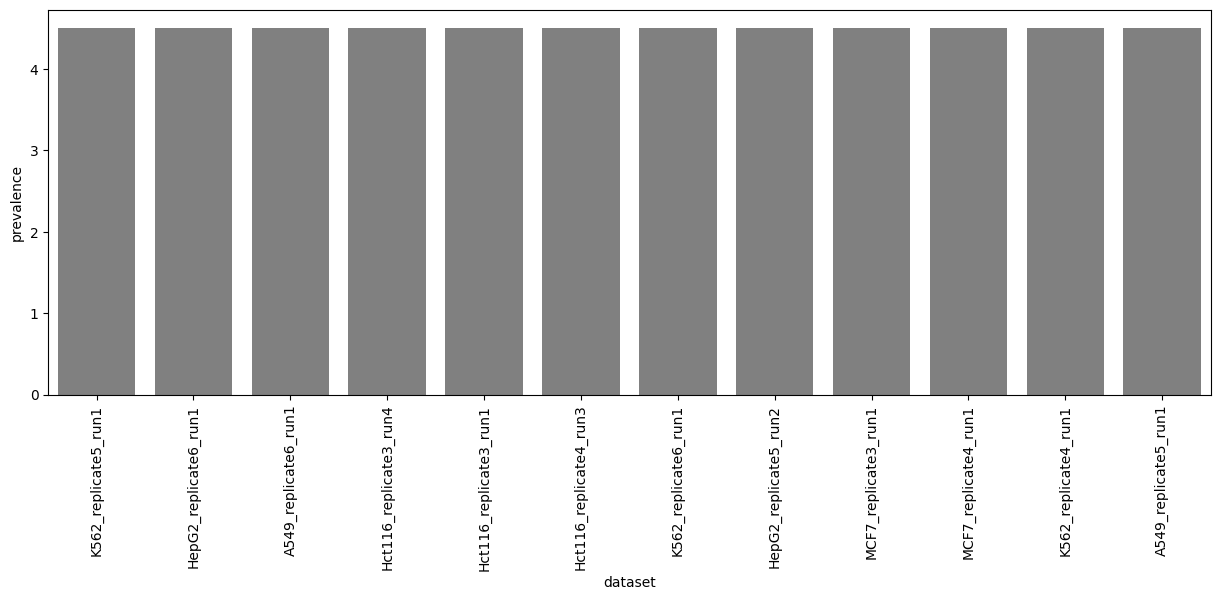

In [23]:
plt.figure(figsize=(15,5))
chart = sns.barplot(
    data = prev_indiv_df.sort_values('prevalence', ascending = False),
    x = 'dataset',
    y = 'prevalence',
    color = 'grey')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)

# Sequence Logo

## Position count matrix of sevenmers

In [24]:
A549_seq = A549.loc[:,["sevenmers", "pred"]]
A549_seq["fivemers"] = A549_seq["sevenmers"].str[1:-1]

Hct116_seq = Hct116.loc[:,["sevenmers", "pred"]]
Hct116_seq["fivemers"] = Hct116_seq["sevenmers"].str[1:-1]

HepG2_seq = HepG2.loc[:,["sevenmers", "pred"]]
HepG2_seq["fivemers"] = HepG2_seq["sevenmers"].str[1:-1]

K562_seq = K562.loc[:,["sevenmers", "pred"]]
K562_seq["fivemers"] = K562_seq["sevenmers"].str[1:-1]

MCF7_seq = MCF7.loc[:,["sevenmers", "pred"]]
MCF7_seq["fivemers"] = MCF7_seq["sevenmers"].str[1:-1]

In [25]:
all_seq = pd.concat([A549_seq, Hct116_seq, HepG2_seq, K562_seq, MCF7_seq])
all_seq.head()

,sevenmers,pred,fivemers
0,AAGACCA,0,AGACC
1,CAAACTG,0,AAACT
2,GAAACAG,0,AAACA
3,AGAACAT,0,GAACA
4,AGGACAA,0,GGACA


### Most common 5-mers that are predicted as modified

In [26]:
all_seq_modified = all_seq.loc[all_seq["pred"] == 1]
total = len(all_seq_modified)
all_seq_modified.fivemers.value_counts()/total*100

GGACT    21.490709
AGACT    20.844033
TGACT    18.111643
GGACA    17.268449
GGACC    16.054753
GAACT     2.730817
AAACT     2.118728
AGACC     0.661349
AGACA     0.616281
GAACA     0.078083
GAACC     0.018080
TGACC     0.003406
TGACA     0.002620
TAACT     0.000786
AAACC     0.000262
Name: fivemers, dtype: float64

### Generate sequence logos 

In [27]:
def get_seqlogo(data, label):
    colnames = ["position_" + str(i+1) for i in range(5)]
    for i in range(5):
        data[colnames[i]] = data["fivemers"].str[i]
    
    pred_m6A_lung = data[data["pred"] == label]
    pred_m6A_lung = pred_m6A_lung.loc[:, colnames]

    all_bases = pd.DataFrame(columns = ["A", "C", "T", "G"])

    for col in colnames:
        count = pred_m6A_lung[col].value_counts()
        new_row = np.transpose(count.to_frame())
        new_row = new_row.merge(all_bases, how='left')
        if col == "position_1": 
            count_matrix = new_row.copy()
        else:
            count_matrix = pd.concat([count_matrix, new_row])

    count_matrix = count_matrix.reset_index(drop = True)
    count_matrix = count_matrix.fillna(0)
    count_matrix = count_matrix.loc[:, ["A", "C", "T", "G"]]

    count_prop = count_matrix.div(count_matrix.sum(axis=1), axis=0)

    seqlogo1 = seqlogo.Ppm(count_prop, alphabet="ACTG")
    seqlogo2 = seqlogo.seqlogo(seqlogo1, ic_scale = False, format = 'png', size = 'small')
    return count_prop, seqlogo2

#### Sequence logo for all cancer cell lines

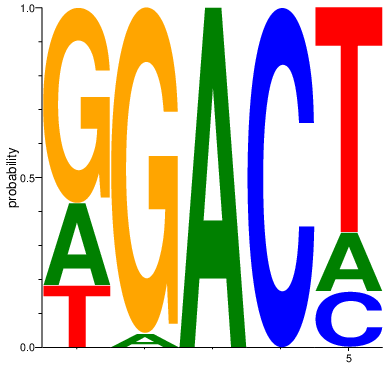

In [28]:
all_seq_count_label1_prop, all_seq_label1_seqlogo = get_seqlogo(all_seq, 1)
all_seq_label1_seqlogo

In [29]:
all_seq_count_label1_prop

,A,C,G,T
0,0.242407,0.000000,0.181185,0.576409
1,0.049468,0.000000,0.000000,0.950532
2,1.000000,0.000000,0.000000,0.000000
3,0.000000,1.000000,0.000000,0.000000
4,0.179654,0.167378,0.652967,0.000000


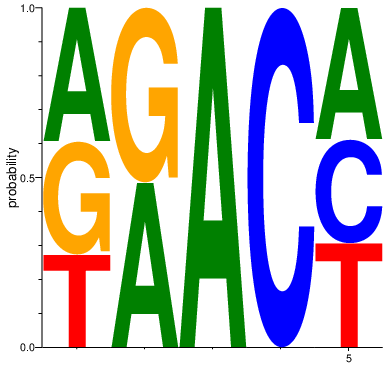

In [30]:
all_seq_count_label0_prop, all_seq_label0_seqlogo = get_seqlogo(all_seq, 0)
all_seq_label0_seqlogo

#### Sequence Logo for A549

In [31]:
A549_count_label1_prop, A549_label1_seqlogo = get_seqlogo(A549_seq, 1)

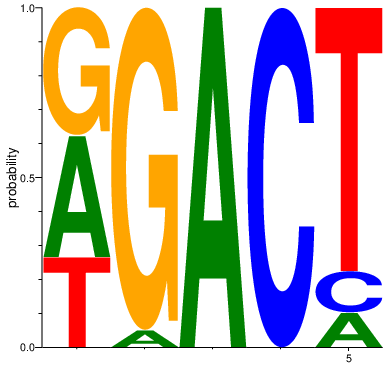

In [32]:
A549_label1_seqlogo

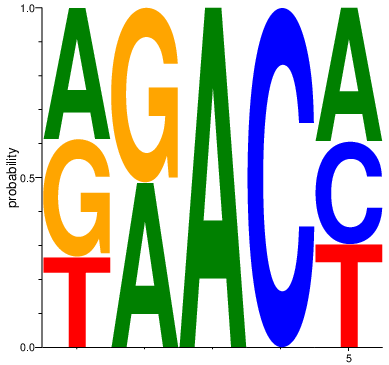

In [33]:
A549_count_label0_prop, A549_label0_seqlogo = get_seqlogo(A549_seq, 0)
A549_label0_seqlogo

#### Sequence Logo for Hct116

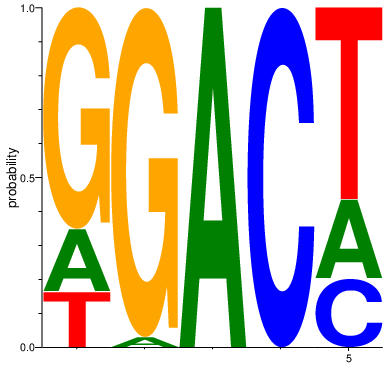

In [34]:
Hct116_count_label1_prop, Hct116_label1_seqlogo = get_seqlogo(Hct116_seq, 1)
Hct116_label1_seqlogo

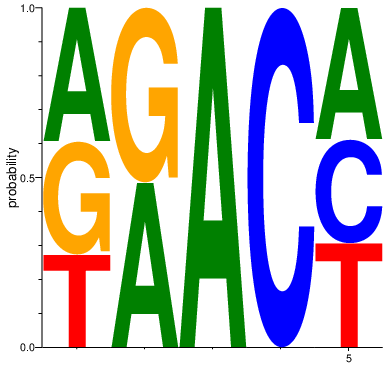

In [35]:
Hct116_count_label0_prop, Hct116_label0_seqlogo = get_seqlogo(Hct116_seq, 0)
Hct116_label0_seqlogo

#### Sequence Logo for HepG2

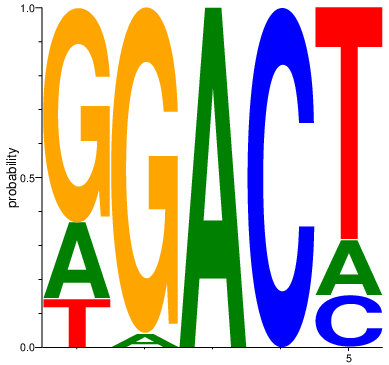

In [36]:
HepG2_count_label1_prop, HepG2_label1_seqlogo = get_seqlogo(HepG2_seq, 1)
HepG2_label1_seqlogo

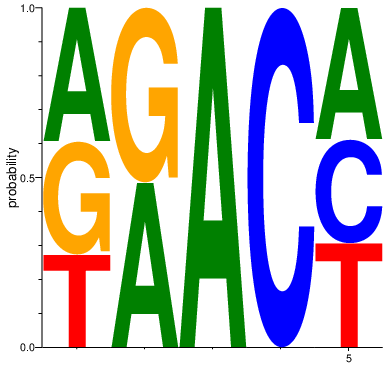

In [37]:
HepG2_count_label0_prop, HepG2_label0_seqlogo = get_seqlogo(HepG2_seq, 0)
HepG2_label0_seqlogo

#### Sequence Logo for K562

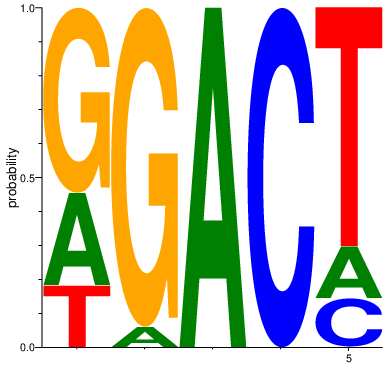

In [38]:
K562_count_label1_prop, K562_label1_seqlogo = get_seqlogo(K562_seq, 1)
K562_label1_seqlogo

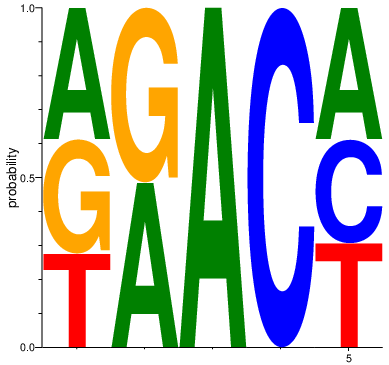

In [39]:
K562_count_label0_prop, K562_label0_seqlogo = get_seqlogo(K562_seq, 0)
K562_label0_seqlogo

#### Sequence Logo for MCF7

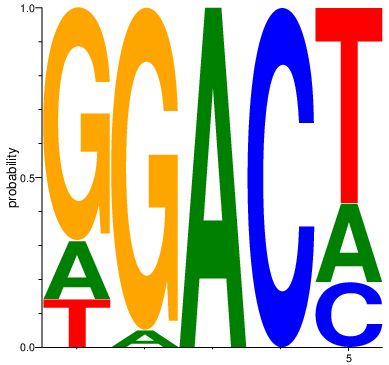

In [40]:
MCF7_count_label1_prop, MCF7_label1_seqlogo = get_seqlogo(MCF7_seq, 1)
MCF7_label1_seqlogo

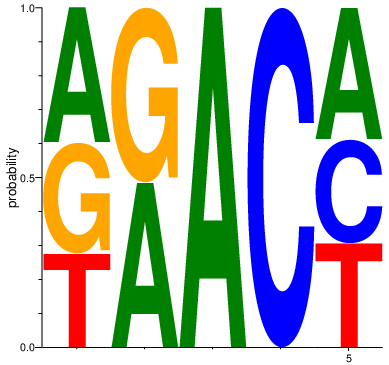

In [41]:
MCF7_count_label0_prop, MCF7_label0_seqlogo = get_seqlogo(MCF7_seq, 0)
MCF7_label0_seqlogo

# Boxplots of numerical features across cancer cell lines

In [42]:
A549["Cell Line"] = "A549"
Hct116["Cell Line"] = "Hct116"
HepG2["Cell Line"] = "HepG2"
K562["Cell Line"] = "K562"
MCF7["Cell Line"] = "MCF7"

In [43]:
all_cells = pd.concat([A549, Hct116, HepG2, K562, MCF7])
all_cells.head()
all_cells["Cell Line"].unique()

array(['A549', 'Hct116', 'HepG2', 'K562', 'MCF7'], dtype=object)

In [44]:
all_cells["fivemers"] = all_cells["sevenmers"].str[1:-1]

Only filter the fivemer GGACT as this is the DRACH sequence motif that is most common and likely to be predicted modified

In [45]:
all_cells_GGACT = all_cells.loc[all_cells["fivemers"] == "GGACT",:]

def get_prediction(x):
    if x == 0:
        return "Unmodified"
    else:
        return "Modified"
    
all_cells_GGACT["Prediction"] = all_cells_GGACT["pred"].apply(lambda x: get_prediction(x))

/tmp/ipykernel_2274/1208117097.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_cells_GGACT["Prediction"] = all_cells_GGACT["pred"].apply(lambda x: get_prediction(x))


In [46]:
num_vars = A549_replicate5_run1.select_dtypes(include=['float64']).columns.values

Boxplots of all numerical variables

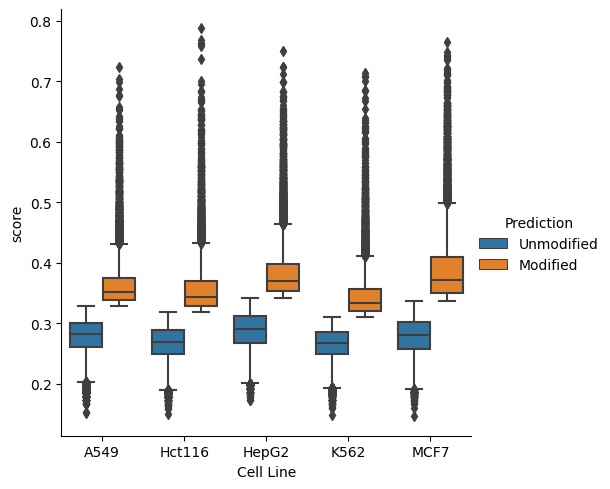

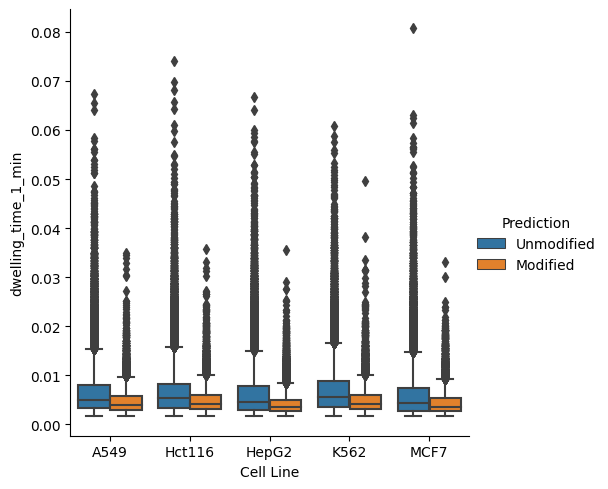

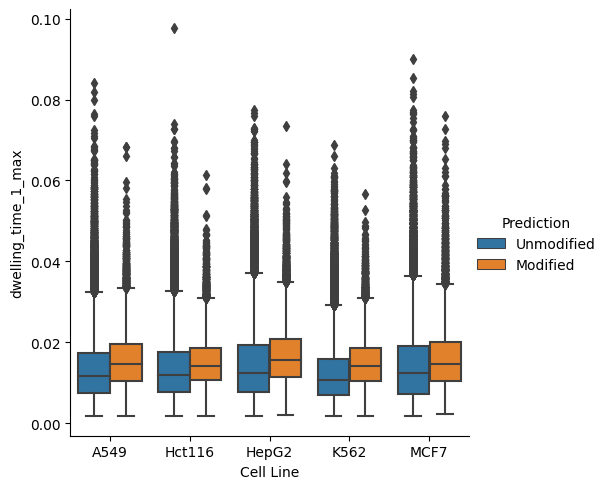

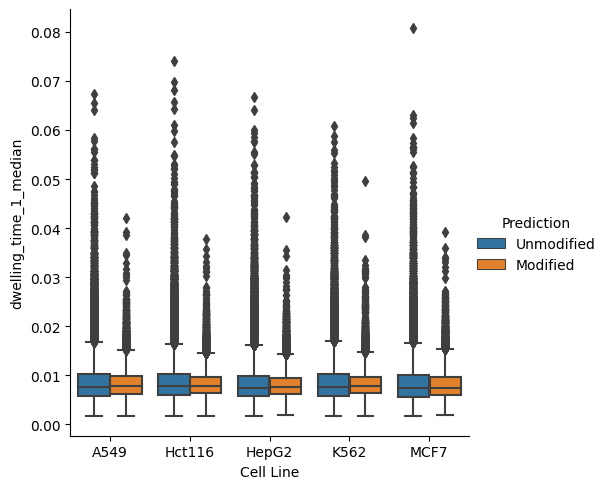

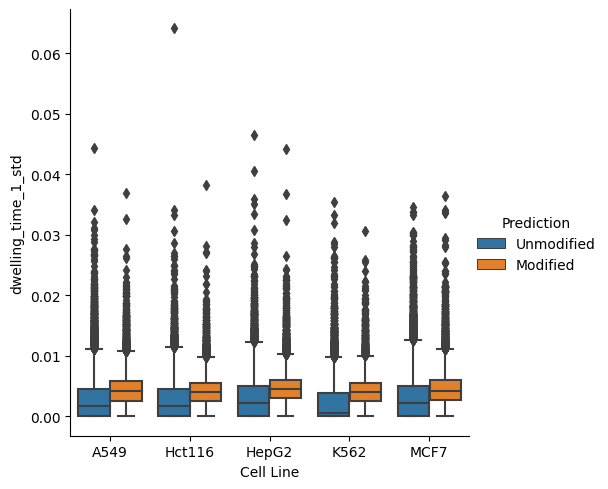

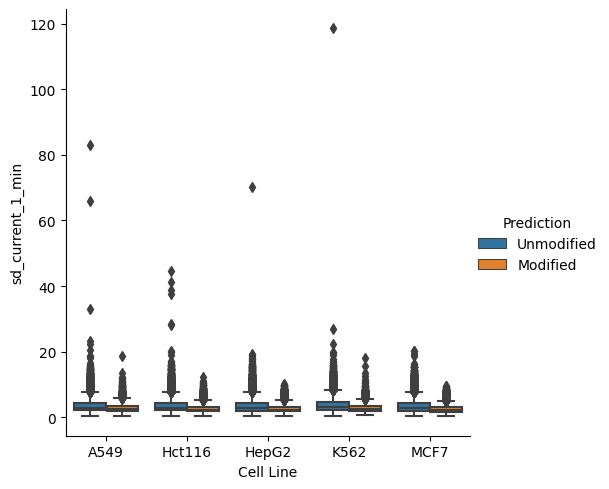

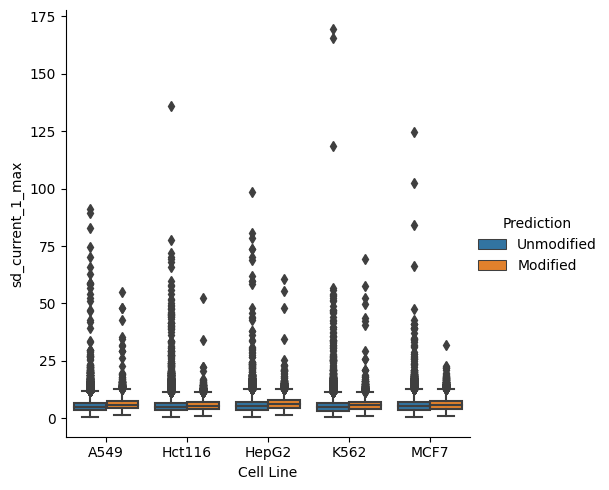

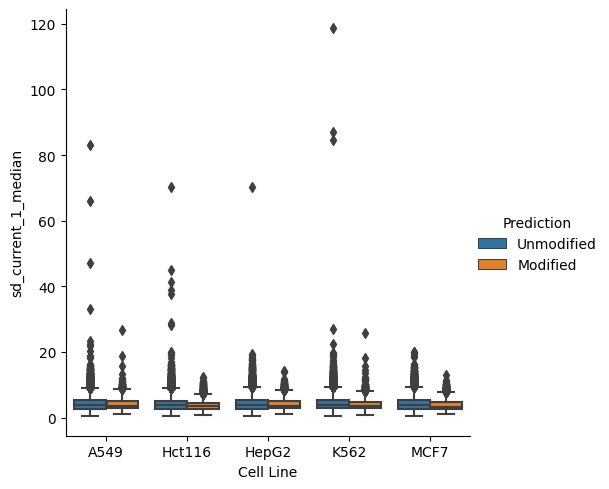

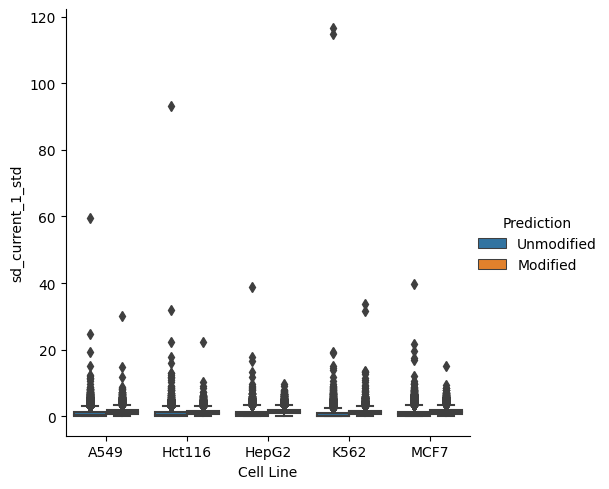

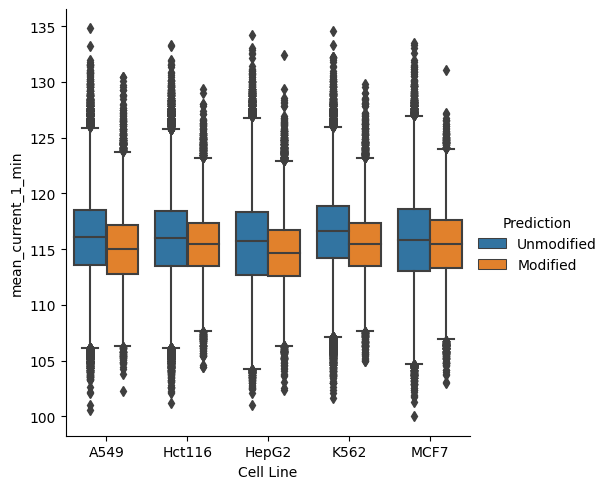

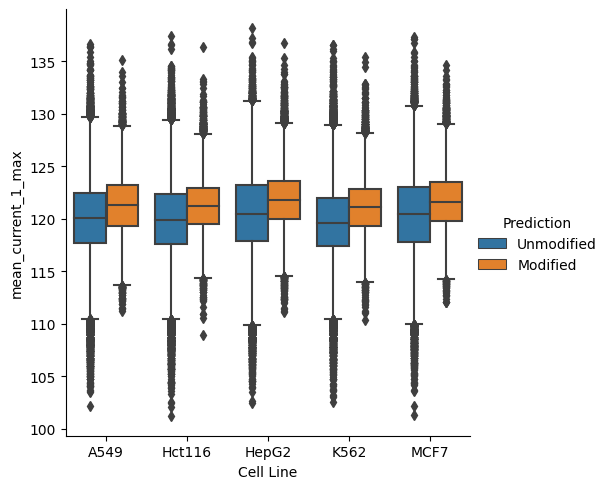

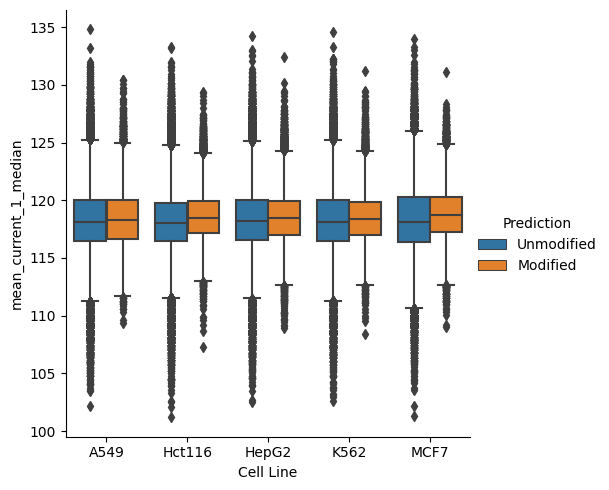

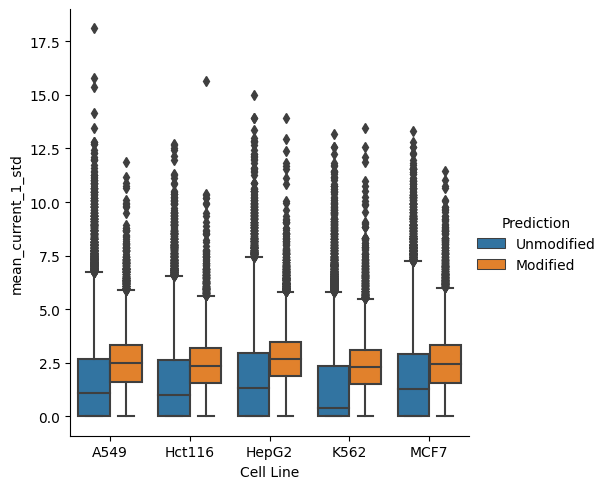

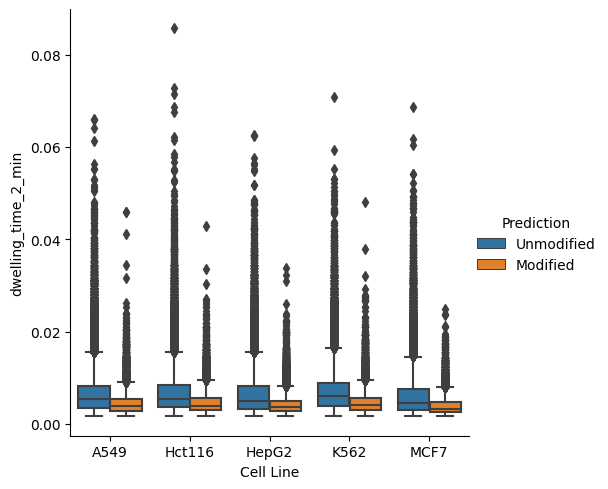

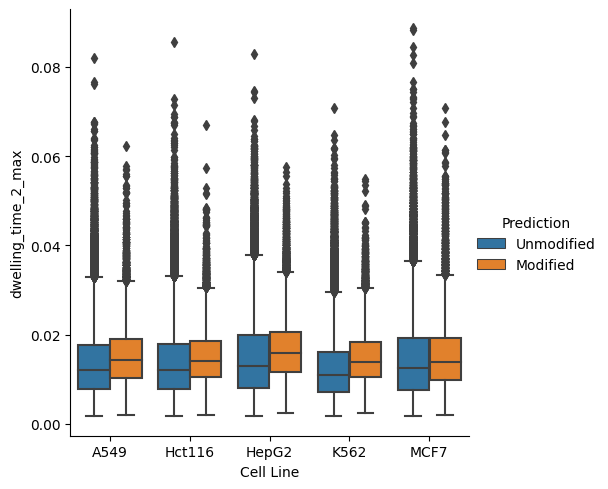

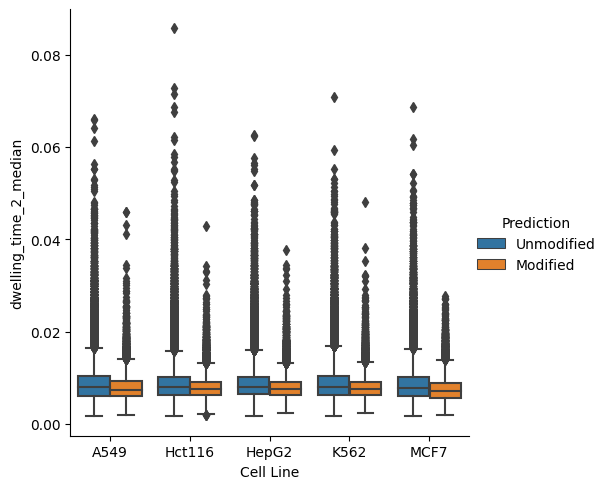

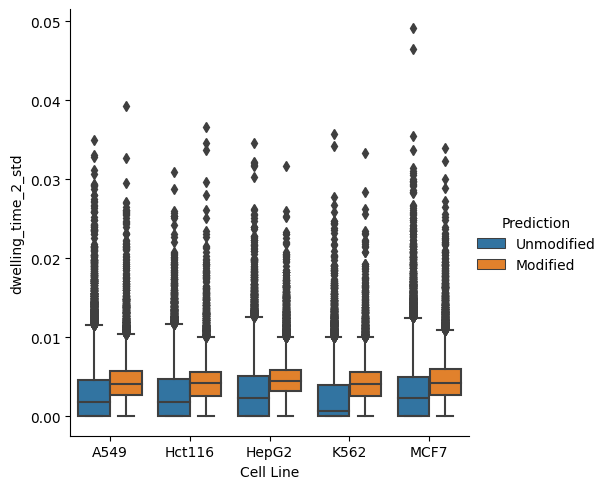

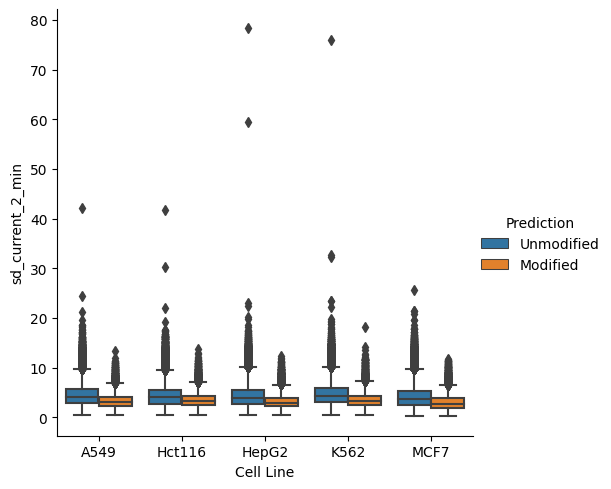

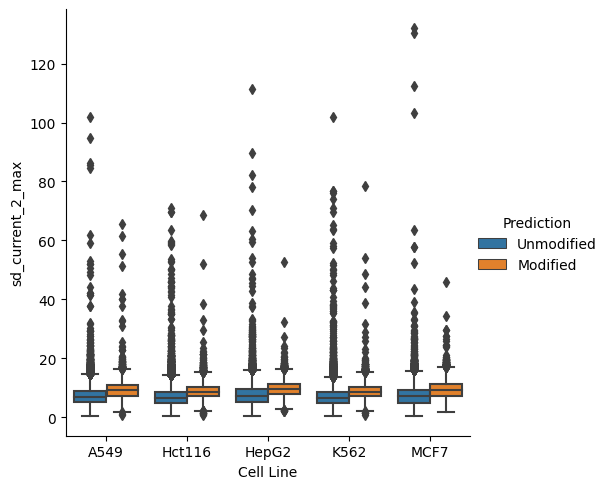

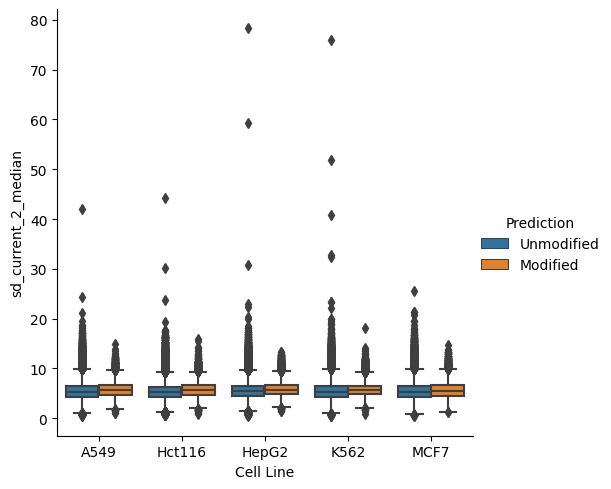

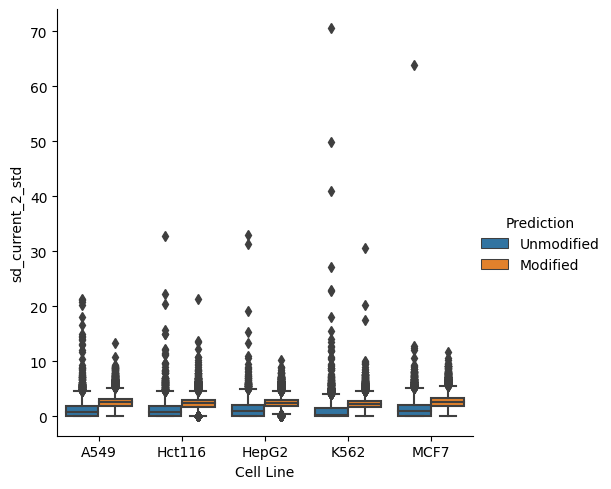

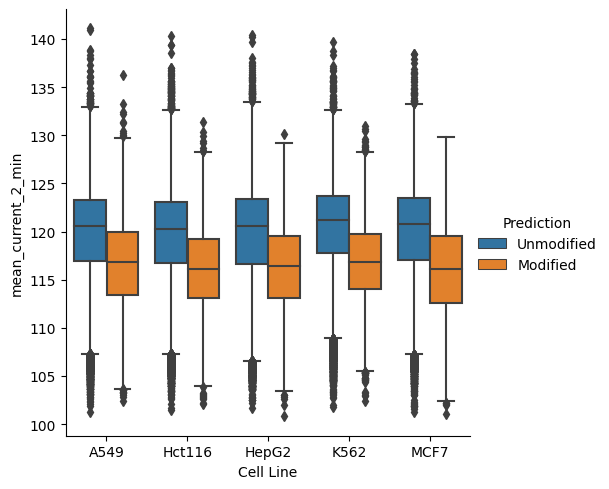

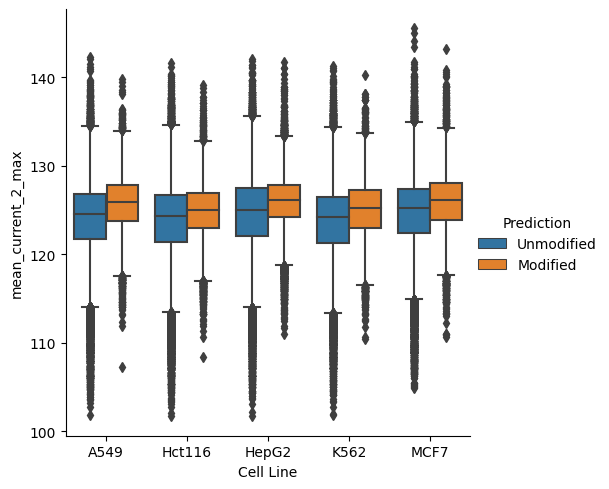

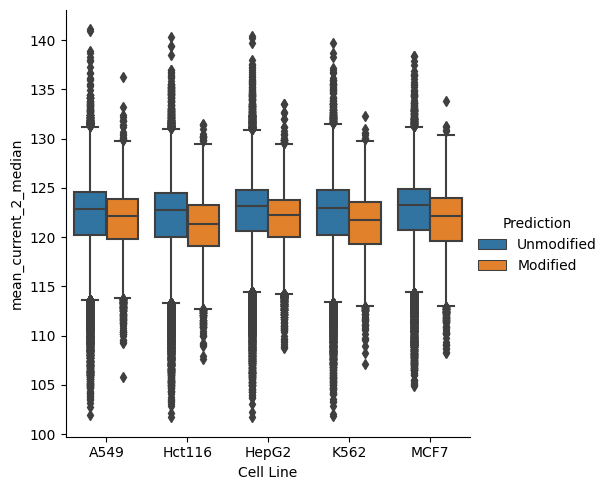

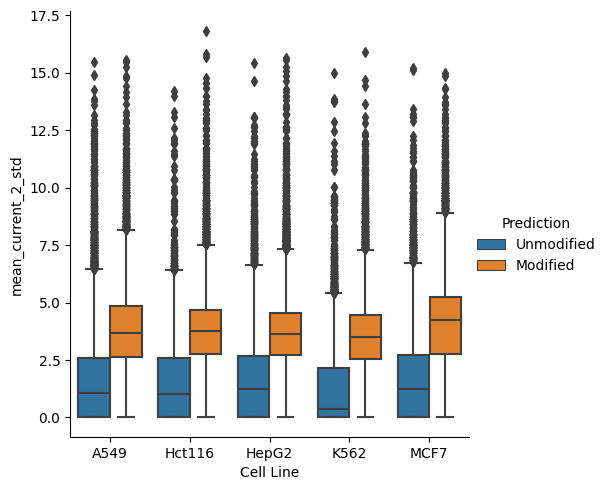

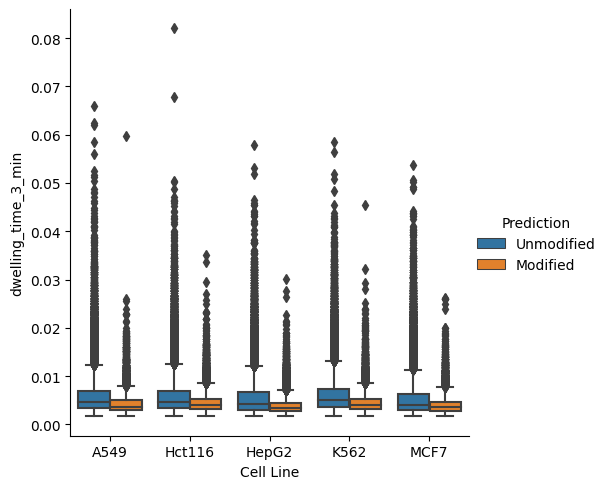

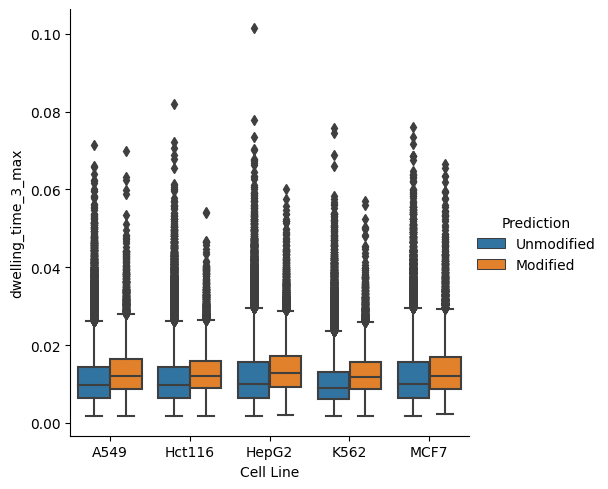

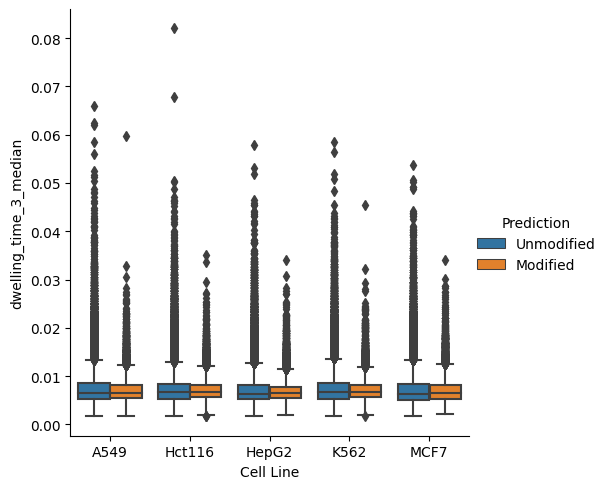

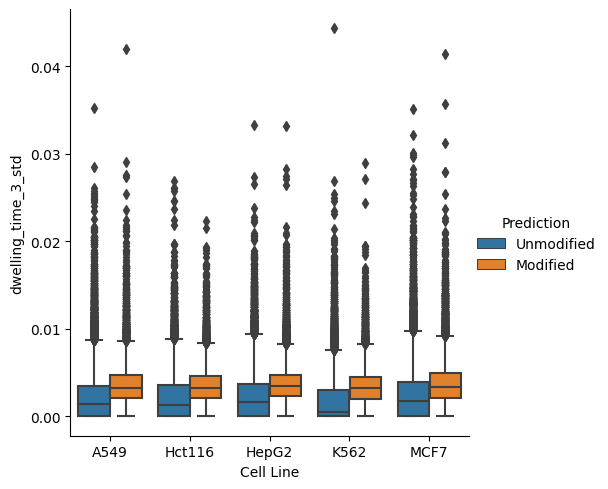

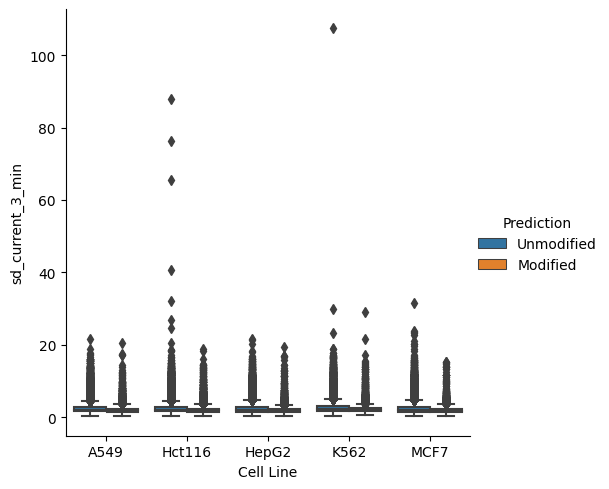

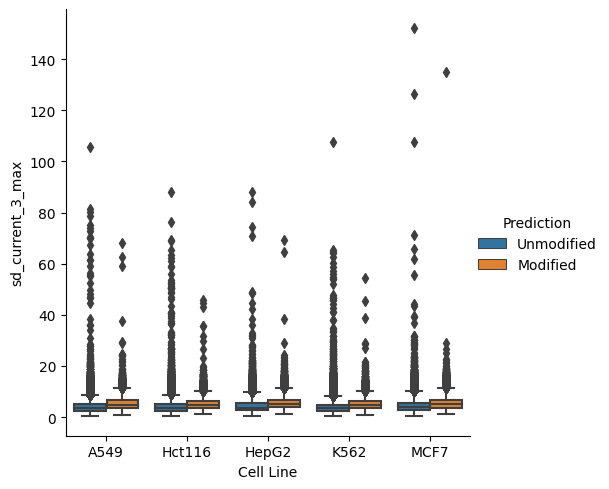

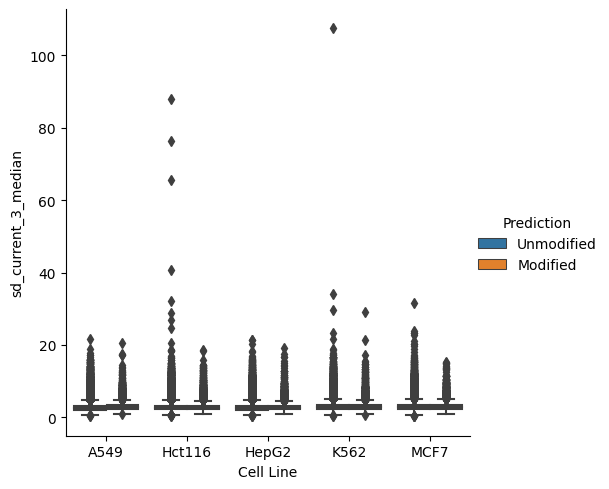

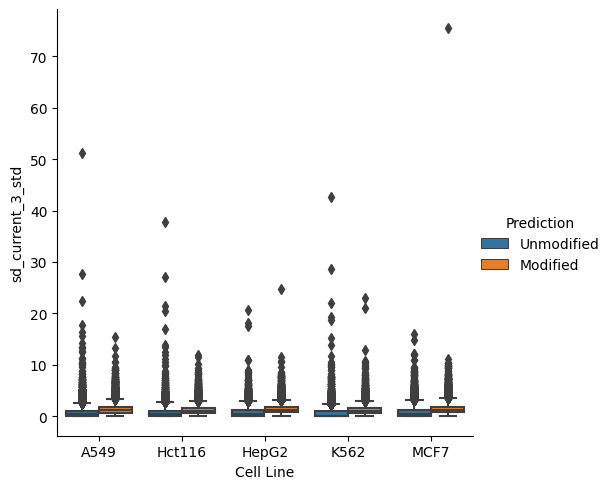

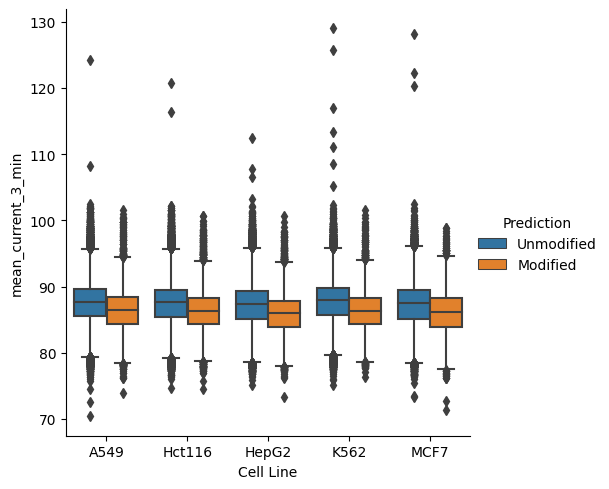

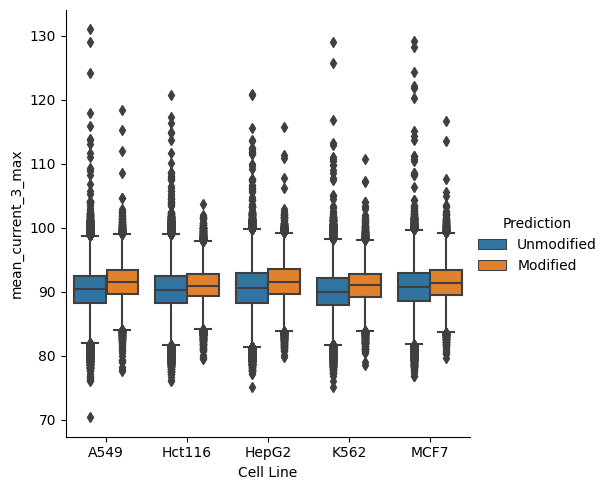

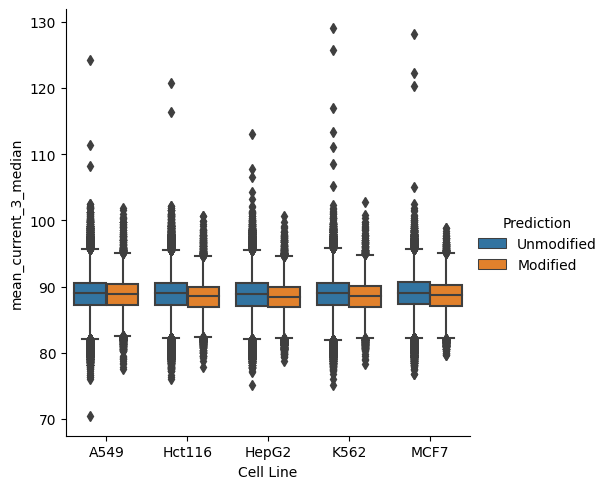

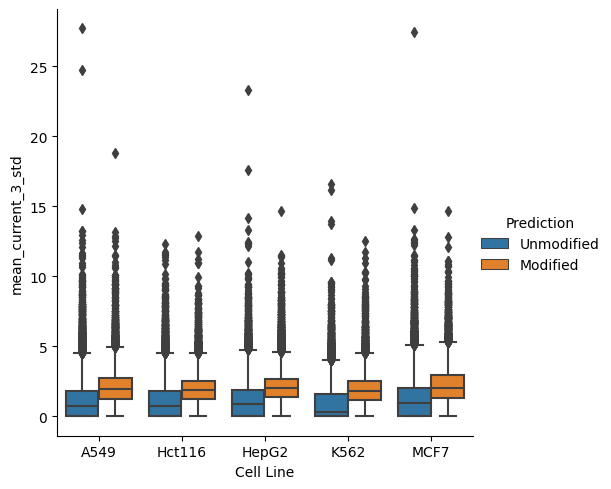

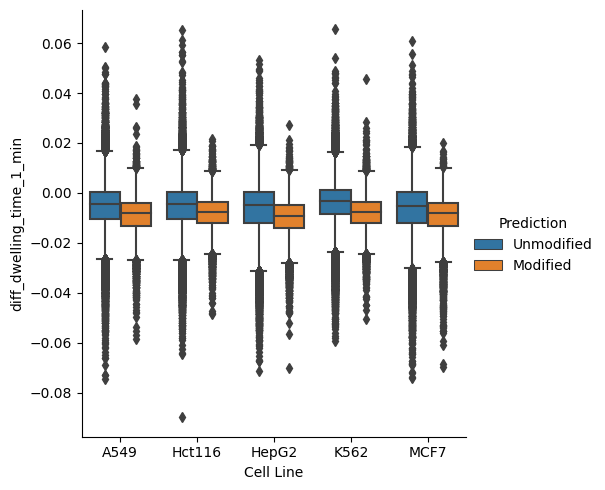

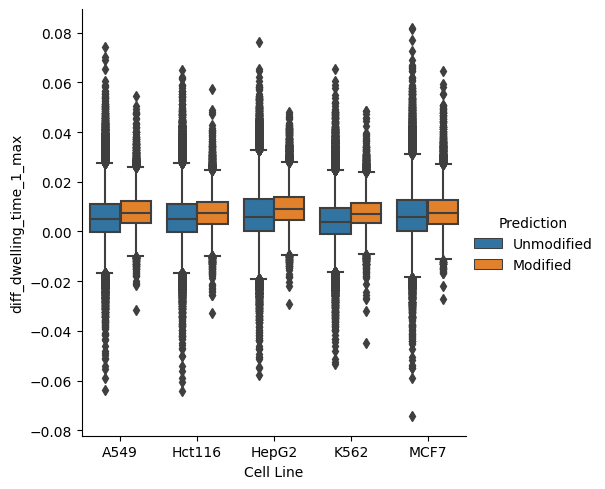

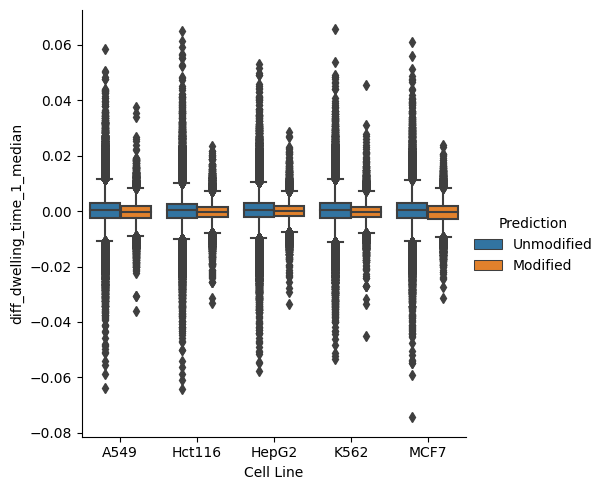

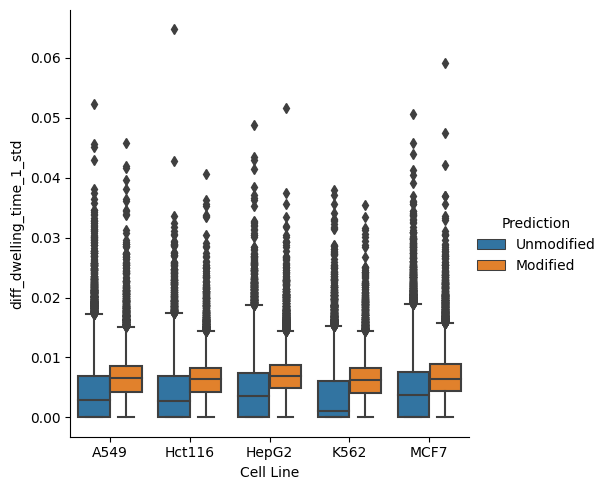

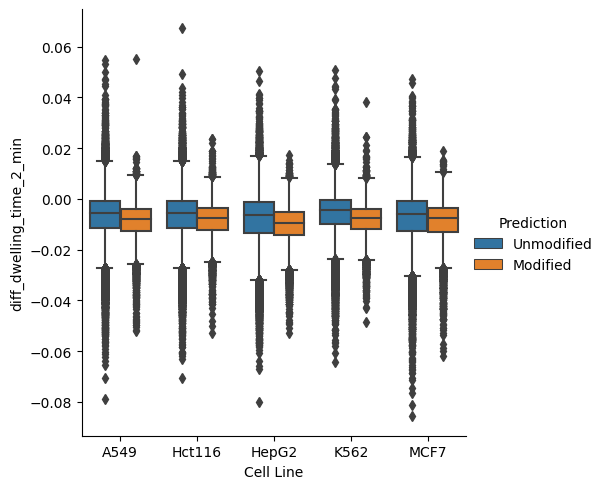

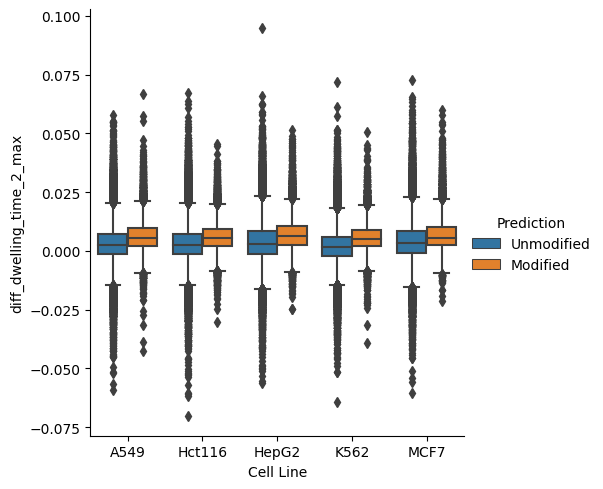

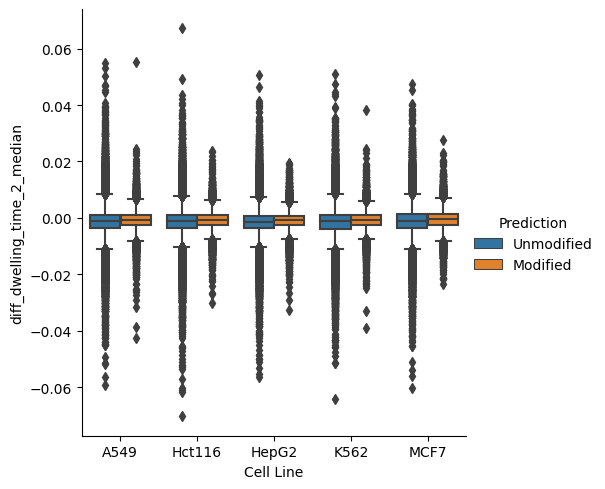

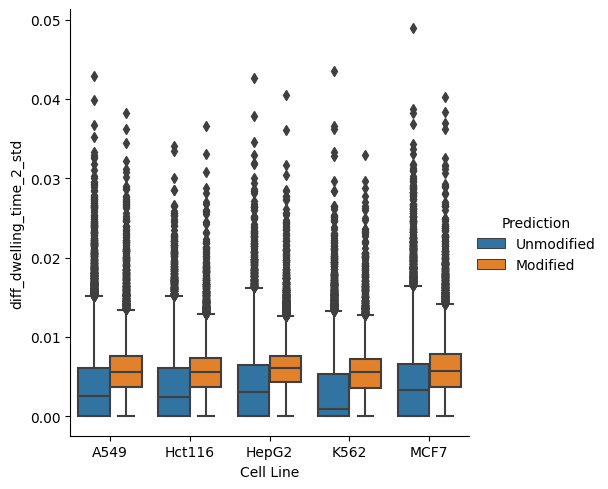

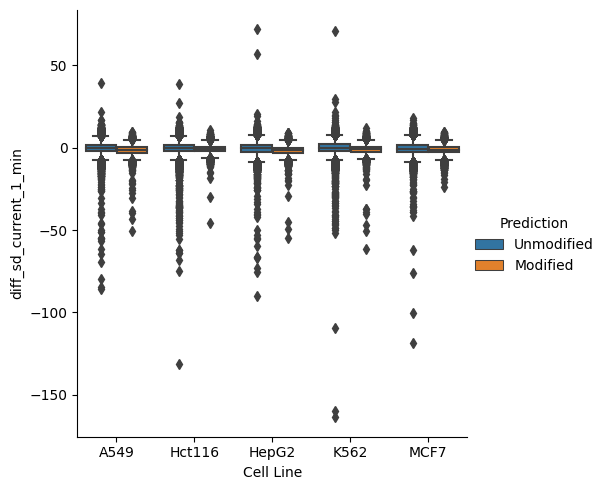

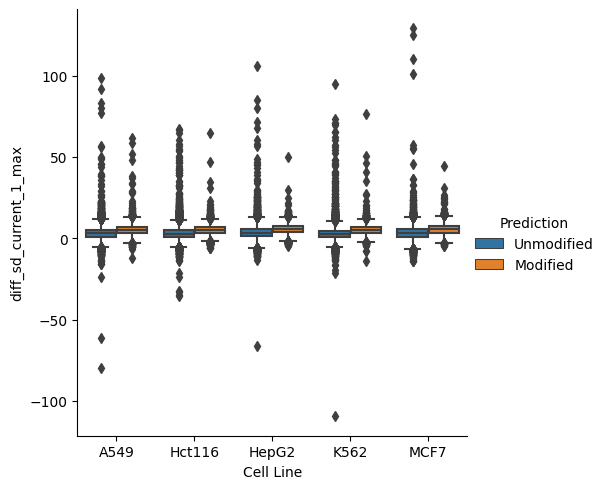

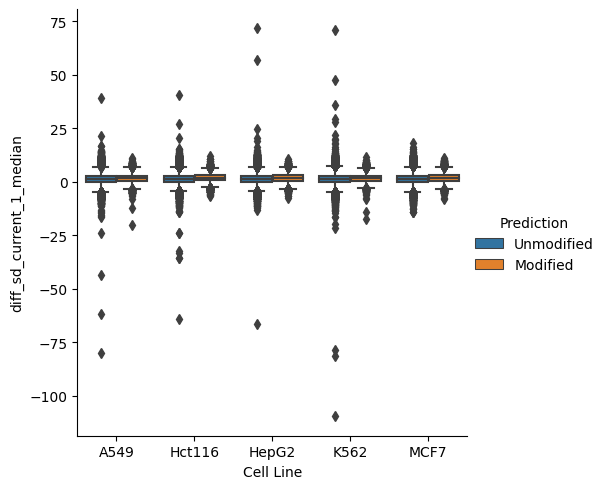

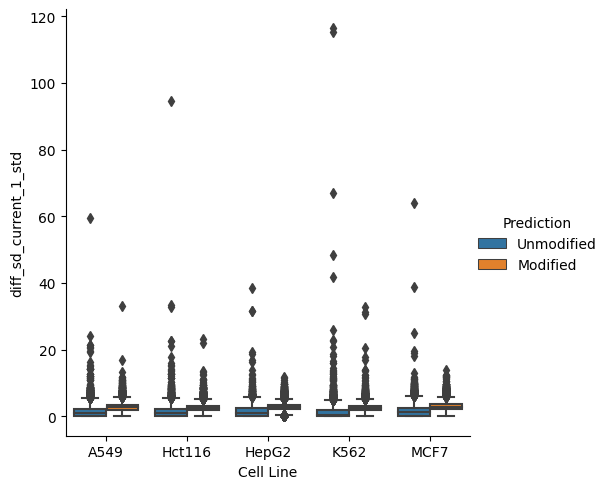

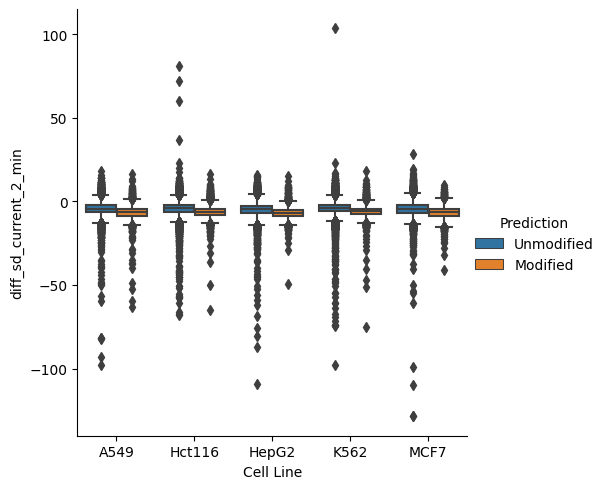

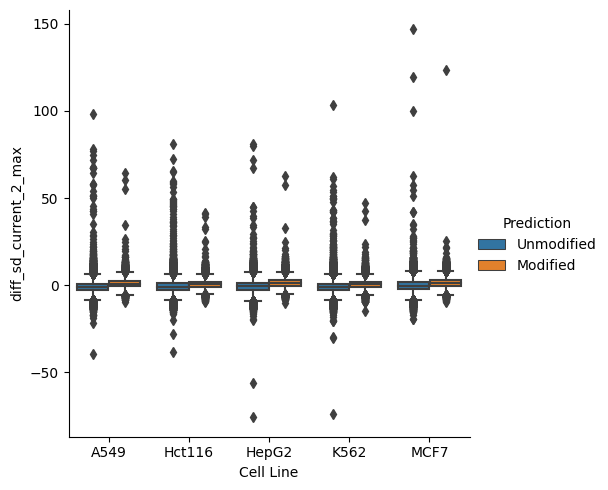

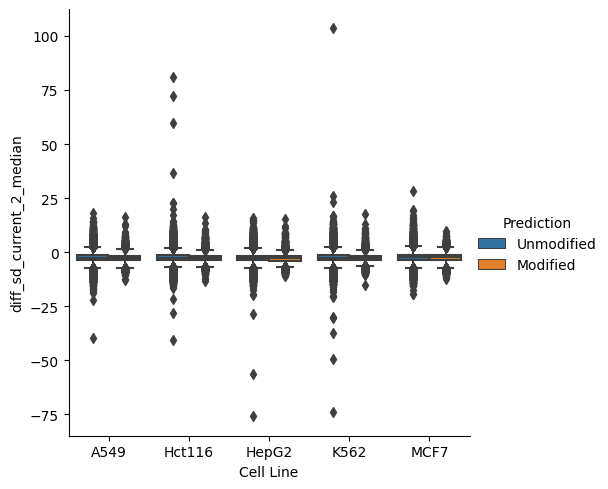

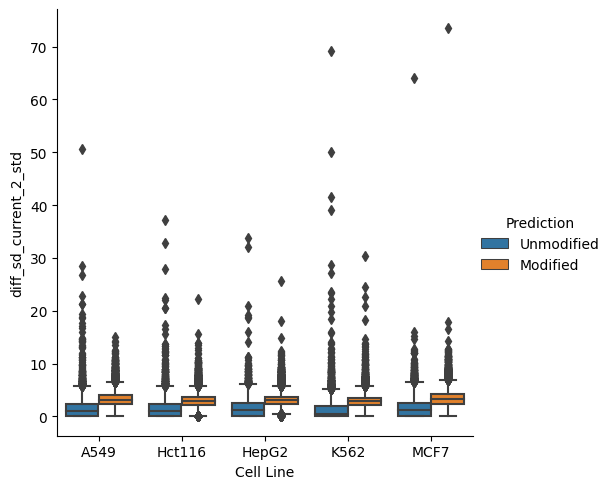

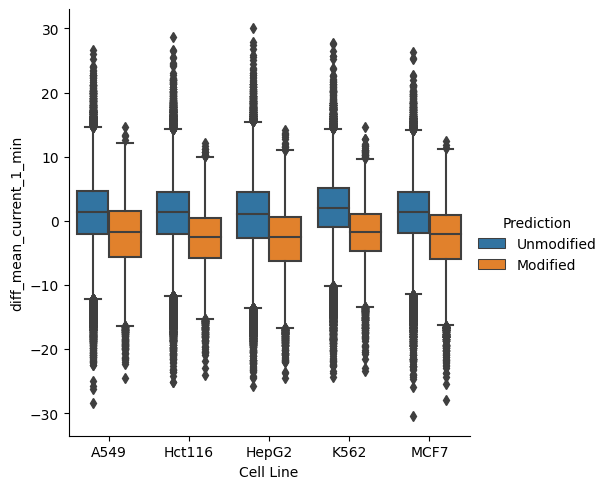

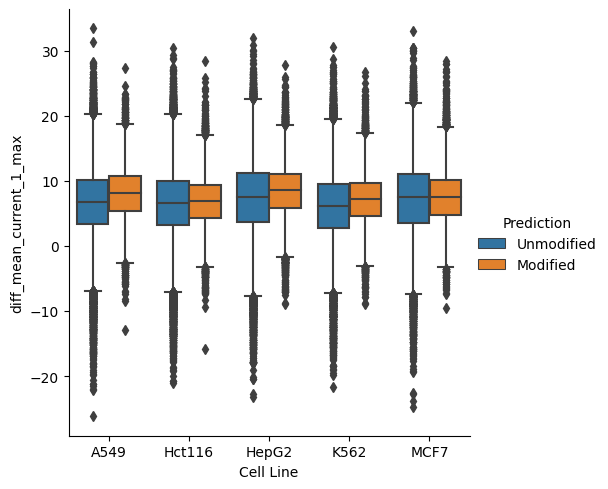

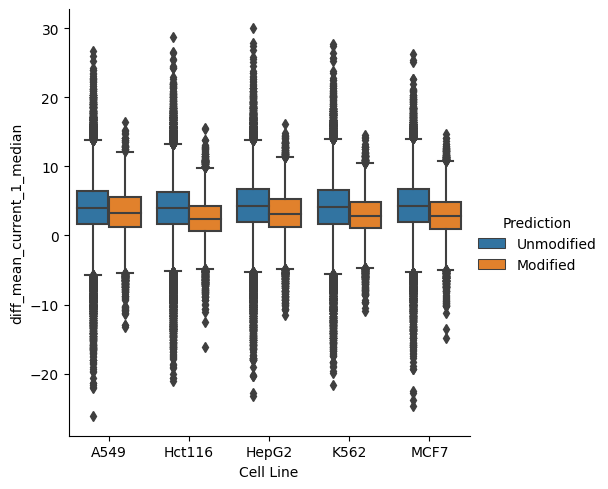

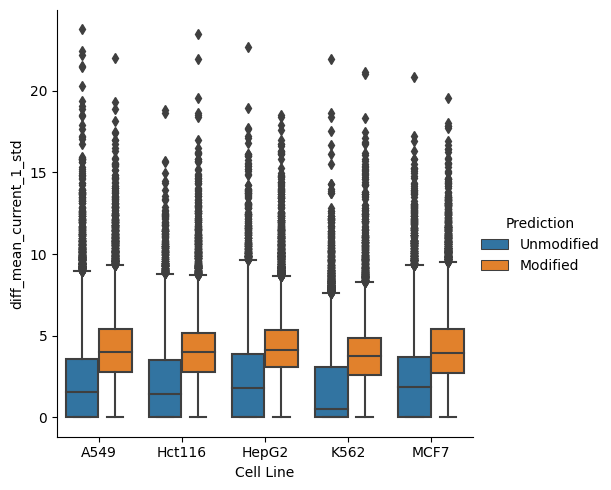

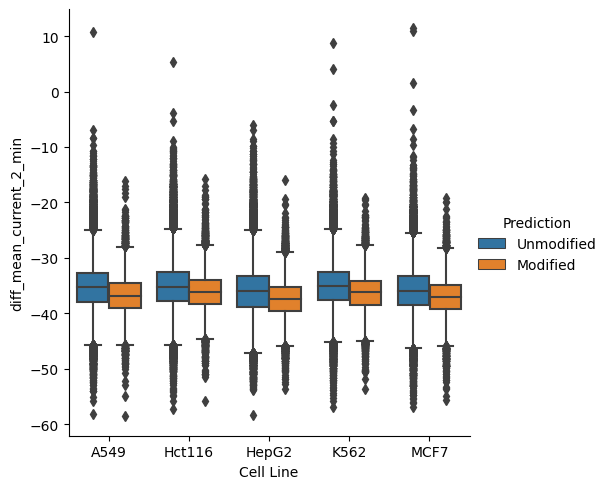

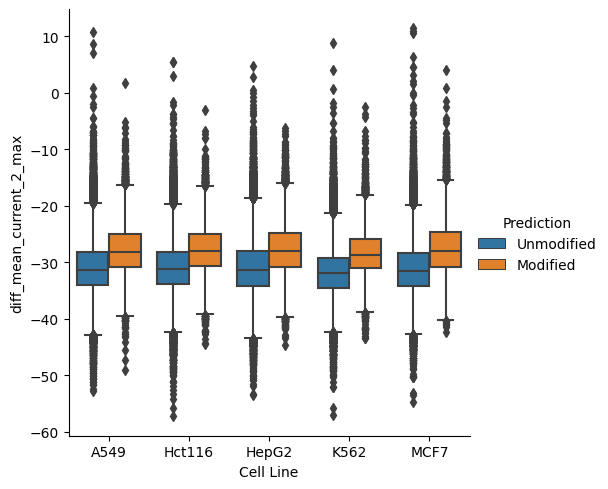

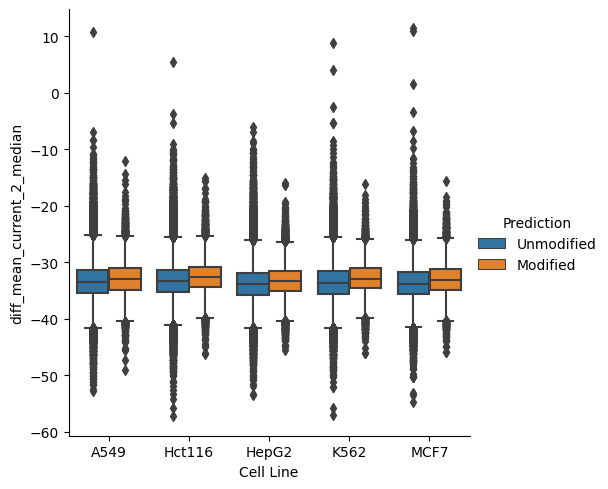

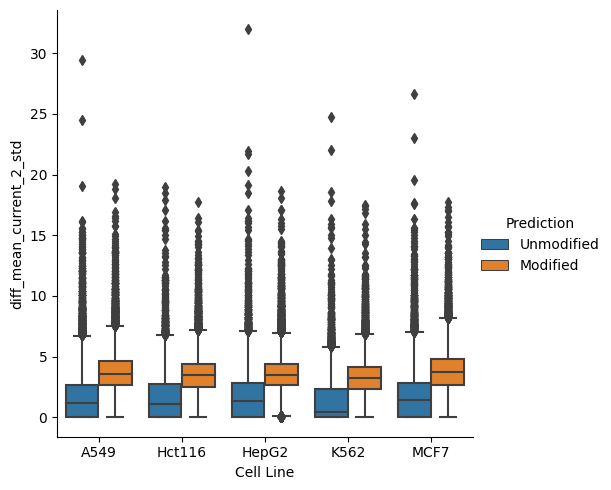

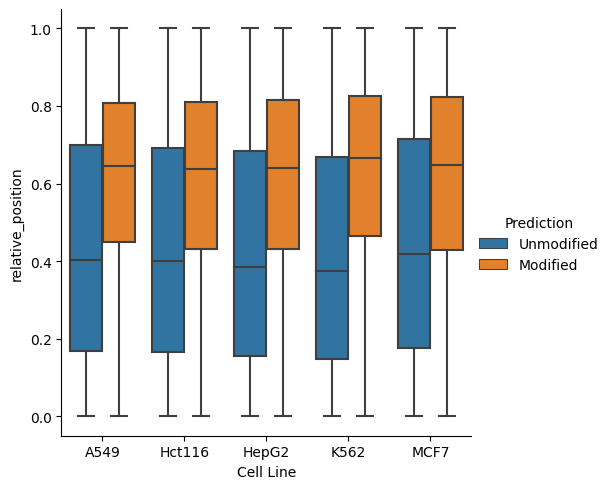

In [47]:
for var in num_vars: 
    ax = sns.catplot(x="Cell Line", y=var, hue="Prediction",
                kind="box", data=all_cells_GGACT)
    plt.show()

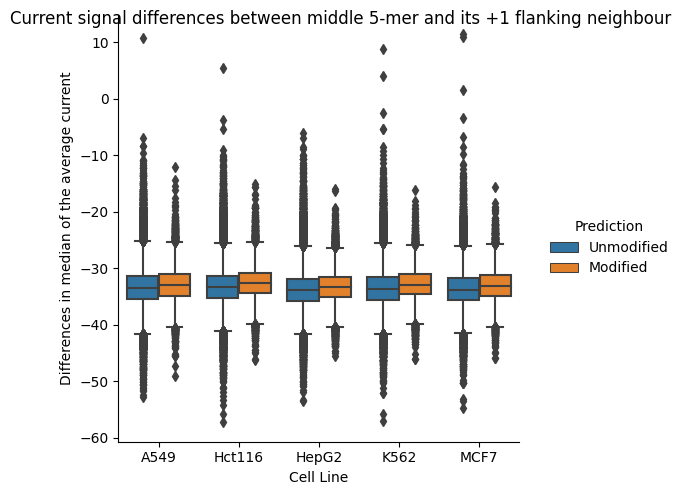

In [48]:
ax = sns.catplot(x="Cell Line", y="diff_mean_current_2_median", hue="Prediction",
            kind="box", data=all_cells_GGACT)
ax.set(ylabel="Differences in median of the average current")
ax.fig.suptitle("Current signal differences between middle 5-mer and its +1 flanking neighbour")
plt.show()

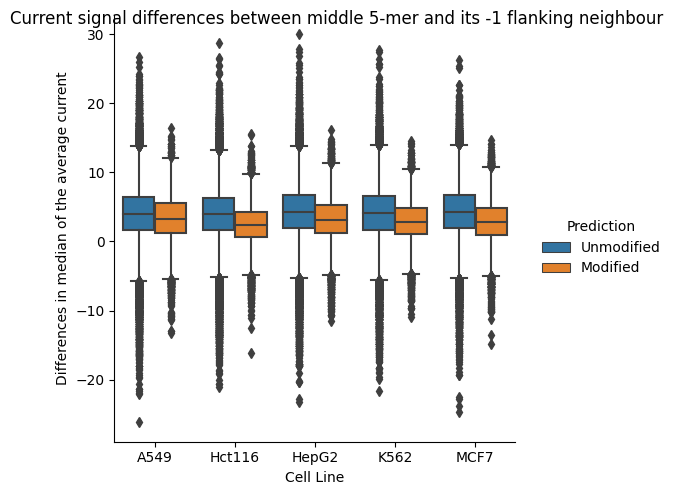

In [49]:
ax = sns.catplot(x="Cell Line", y="diff_mean_current_1_median", hue="Prediction",
            kind="box", data=all_cells_GGACT)
ax.set(ylabel="Differences in median of the average current")
ax.fig.suptitle("Current signal differences between middle 5-mer and its -1 flanking neighbour")
plt.show()

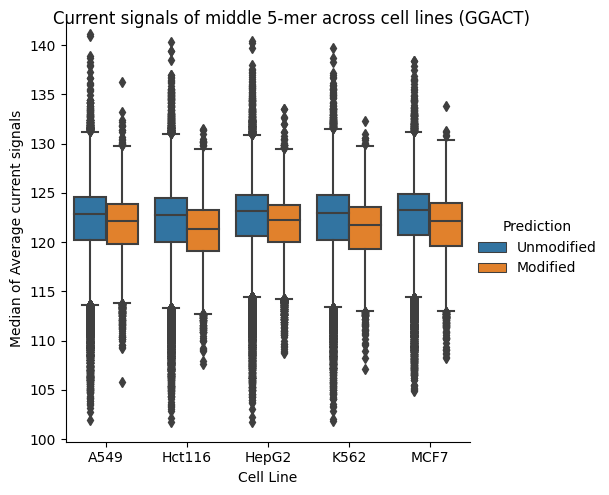

In [50]:
ax = sns.catplot(x="Cell Line", y="mean_current_2_median", hue="Prediction",
            kind="box", data=all_cells_GGACT)
ax.set(ylabel="Median of Average current signals")
ax.fig.suptitle("Current signals of middle 5-mer across cell lines (GGACT)")
plt.show()

# Feature Specificity
Find all m6a mod predicted 1, find no of cell lines that have that transcript

In [51]:
# input: dfs, df_names, pred_val (T/F to determine if we only want those with pred = 1), more_three (T/F to determine if we want to group those w n>3), var (which variables we want to specify eg transcript id or transcript id and position)
# output: value counts data frame that shows the number of m6A variant carrying var(eg transcript id or transcript id and position) shared among n tissues
def tissue_specificity(dfs, df_names, pred_val, more_three, var):
    # get dataframe of all var in all dfs
    combined_vars = pd.DataFrame()
    for i in range(len(df_names)):
        tmp_df = dfs[i]
        if pred_val == True:
            tmp_df = tmp_df[tmp_df['pred'] == 1][var].drop_duplicates()
        else:
            tmp_df = tmp_df[var].drop_duplicates()
        combined_vars = pd.concat([combined_vars, tmp_df], axis = 0)
    # get dataframe of number of times each set of var appears
    var_count = combined_vars.groupby(var).size().reset_index(name='count')
    if more_three == True:
        var_count['count'] = var_count['count'].apply(lambda x: more_than_3(x))
    # get dataframe of number of var that are in n tissue(s)
    tissue_spec = var_count.groupby(['count']).size().reset_index(name='num_var')
    return tissue_spec

In [52]:
def more_than_3(x):
    if x > 3:
        return '>3'
    else:
        return str(x)

In [53]:
def plot_bar_TS(data, title, ylabel):
    plt.figure(figsize=(8,5))
    chart = sns.barplot(
        data = data,
        x = 'count',
        y = 'num_var')
    chart.bar_label(chart.containers[0])
    chart.set(title = title)
    chart.set(xlabel='Number of tissues', ylabel=ylabel)

### Tissue specificity by transcript id and position

In [54]:
tissue_specificity(group_data_final, group_names_final, pred_val = True, more_three = False, var = ['transcript_id', 'transcript_position'])

,count,num_var
0,1,195171
1,2,53479
2,3,17388
3,4,5379
4,5,1167


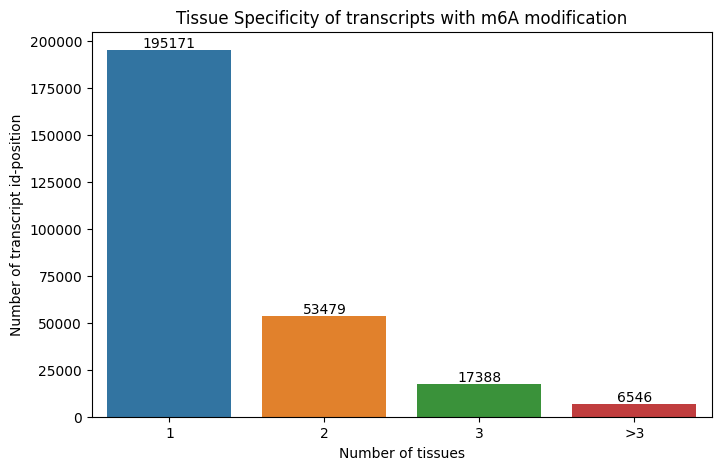

In [55]:
plot_bar_TS(tissue_specificity(group_data_final, group_names_final, pred_val = True, more_three = True, var = ['transcript_id', 'transcript_position']), title = 'Tissue Specificity of transcripts with m6A modification', ylabel = 'Number of transcript id-position')

### Tissue specificity by transcript id

In [56]:
tissue_specificity(group_data_final, group_names_final, pred_val = True, more_three = False, var = ['transcript_id'])

,count,num_var
0,1,19649
1,2,10513
2,3,8033
3,4,7981
4,5,9214


In [57]:
tissue_specificity(group_data_final, group_names_final, pred_val = True, more_three = True, var = ['transcript_id'])

,count,num_var
0,1,19649
1,2,10513
2,3,8033
3,>3,17195


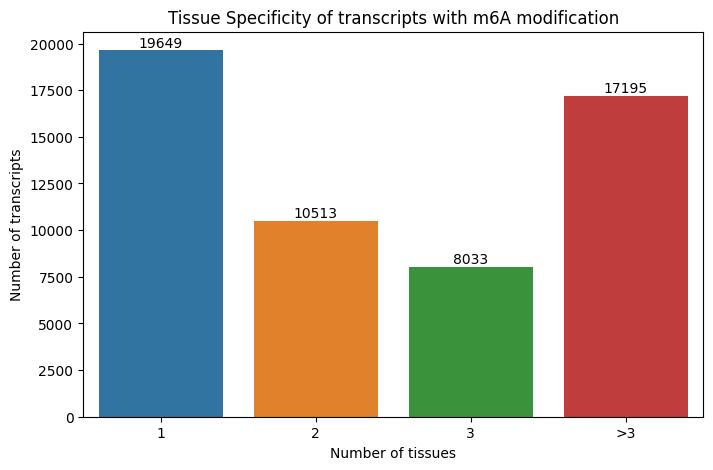

In [58]:
plot_bar_TS(tissue_specificity(group_data_final, group_names_final, pred_val = True, more_three = True, var = ['transcript_id']), title = 'Tissue Specificity of transcripts with m6A modification', ylabel = 'Number of transcripts')

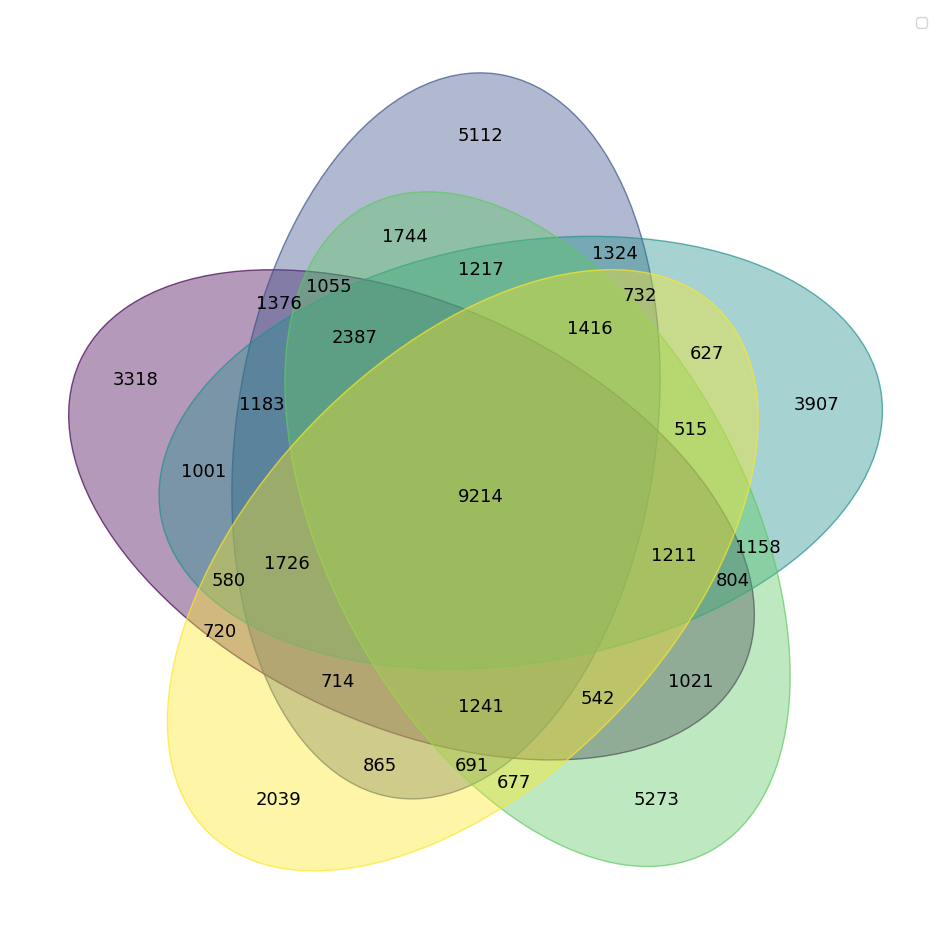

In [59]:
from venn import venn

labels = []
sets = {
    group_names_final[0]: set(group_data_final[0][group_data_final[0]['pred']==1]['transcript_id']),
    group_names_final[1]: set(group_data_final[1][group_data_final[1]['pred']==1]['transcript_id']),
    group_names_final[2]: set(group_data_final[2][group_data_final[2]['pred']==1]['transcript_id']),
    group_names_final[3]: set(group_data_final[3][group_data_final[3]['pred']==1]['transcript_id']),
    group_names_final[4]: set(group_data_final[4][group_data_final[4]['pred']==1]['transcript_id'])
}
fig, ax = plt.subplots(1, figsize=(16,12))
venn(sets, ax=ax)
plt.legend(labels[:-2], ncol=6)

In [60]:
test = (pd.concat([d.assign(col=group_names_final[i]) for i,d in enumerate(group_data_final)]) 
   .pivot_table(index=['transcript_id'], columns='col',  
                values='pred', fill_value=0, aggfunc=np.any)).astype(int)

test = test.loc[(test[group_names_final] != 0).any(axis=1),:].reset_index(level = 0)

test2 = test.pivot_table(index=group_names_final, values='transcript_id', aggfunc='count')

In [61]:
test2

col                          transcript_id
A549 Hct116 HepG2 K562 MCF7               
0    0      0     0    1              2039
                  1    0              5273
                       1               677
            1     0    0              3907
                       1               627
                  1    0              1158
                       1               515
     1      0     0    0              5112
                       1               865
                  1    0              1744
                       1               691
            1     0    0              1324
                       1               732
                  1    0              1217
                       1              1416
1    0      0     0    0              3318
                       1               720
                  1    0              1021
                       1               542
            1     0    0              1001
                       1               580
                  1    0               804
                       1              1211
     1      0     0    0              1376
                       1               714
                  1    0              1055
                       1              1241
            1     0    0              1183
                       1              1726
                  1    0              2387
                       1              9214

In [62]:
test2 = test2.sort_values(by = "transcript_id")
test3 = test2.tail(15) # take the top 15 highest values

In [63]:
test4 = test3.squeeze()

In [64]:
test4

A549  Hct116  HepG2  K562  MCF7
1     0       1      1     1       1211
0     1       1      1     0       1217
1     1       0      1     1       1241
0     1       1      0     0       1324
1     1       0      0     0       1376
0     1       1      1     1       1416
1     1       1      0     1       1726
0     1       0      1     0       1744
      0       0      0     1       2039
1     1       1      1     0       2387
      0       0      0     0       3318
0     0       1      0     0       3907
      1       0      0     0       5112
      0       0      1     0       5273
1     1       1      1     1       9214
Name: transcript_id, dtype: int64

{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

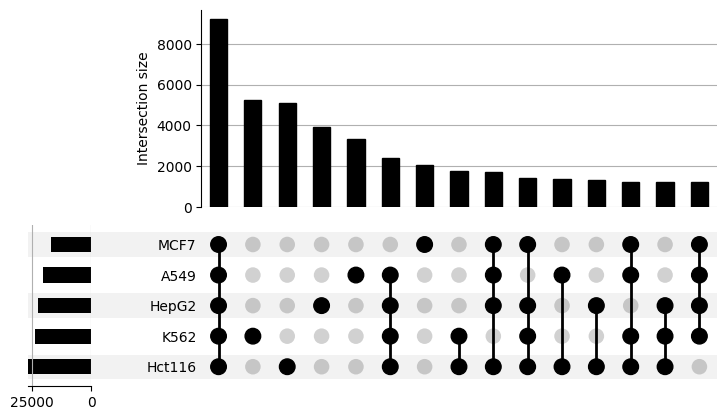

In [65]:
plot(test4, sort_by = "cardinality")

## Pairwise association of tissues in terms of proportion of shared m6A variant carrying 

In [66]:
matrix_df = (pd.concat([d.assign(col=group_names_final[i]) for i,d in enumerate(group_data_final)])
   .pivot_table(index=['transcript_id','transcript_position'], columns='col', 
                values='pred', fill_value=0).reset_index()
)

In [67]:
matrix_df = matrix_df.loc[(matrix_df[group_names_final] != 0).any(axis=1),:]

In [68]:
matrix_df.shape[0] == tissue_specificity(group_data_final, group_names_final, pred_val = True, more_three = False, var = ['transcript_id', 'transcript_position'])['num_var'].sum()

True

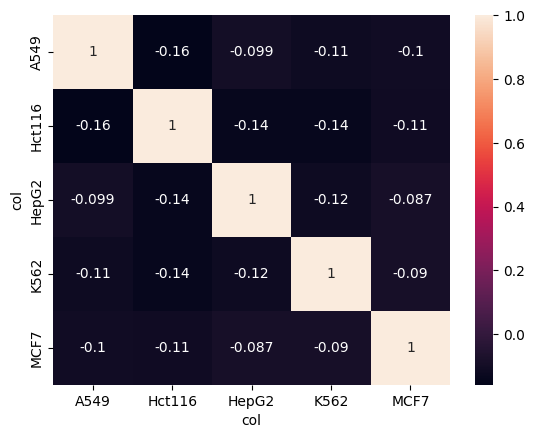

In [69]:
corr_matrix = matrix_df.drop(columns=['transcript_id','transcript_position'], axis=1).corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [70]:
matrix_df_2 = (pd.concat([d.assign(col=group_names_final[i]) for i,d in enumerate(group_data_final)])
   .pivot_table(index=['transcript_id'], columns='col', 
                values='pred', fill_value=0, aggfunc=np.any).reset_index()
)

In [71]:
matrix_df_2[matrix_df_2.columns[1:6]] = matrix_df_2[matrix_df_2.columns[1:6]].astype(int)

In [72]:
matrix_df_2[matrix_df_2.columns[1:6]] = matrix_df_2[matrix_df_2.columns[1:6]].astype(int)

In [73]:
matrix_df_2

col,transcript_id,A549,Hct116,HepG2,K562,MCF7
0,ENST00000000233,1,0,1,1,1
1,ENST00000000412,1,1,1,1,0
2,ENST00000000442,1,0,1,1,0
3,ENST00000001008,0,1,1,0,0
4,ENST00000001146,1,1,0,0,0
...,...,...,...,...,...,...
86119,R2_66_1,0,0,0,0,0
86120,R2_66_2,0,0,0,0,0
86121,R2_6_2,0,0,0,0,0
86122,R2_7_1,0,0,0,0,0


In [74]:
MCF7[MCF7['transcript_id']=='ENST00000000233'][['transcript_position','score','pred']]

,transcript_position,score,pred
0,244,0.170714,0
1,261,0.241682,0
2,316,0.150655,0
3,332,0.173953,0
4,368,0.206741,0
5,404,0.204276,0
6,431,0.289646,0
7,440,0.146052,0
8,471,0.236690,0
9,539,0.245718,0


In [75]:
matrix_df_2 = matrix_df_2.loc[(matrix_df_2[group_names_final] != 0).any(axis=1),:]

In [76]:
matrix_df_2.shape[0] == tissue_specificity(group_data_final, group_names_final, pred_val = True, more_three = False, var = ['transcript_id'])['num_var'].sum()

True

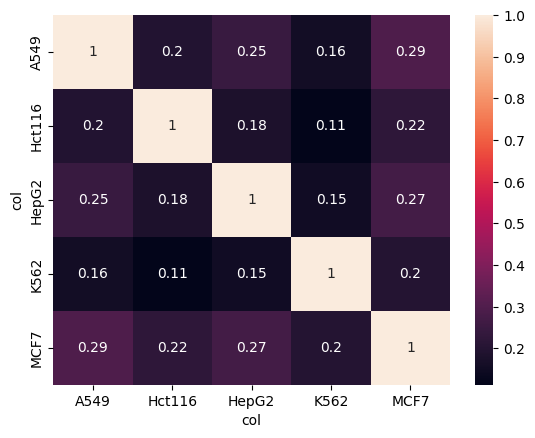

In [77]:
corr_matrix = matrix_df_2.drop(columns=['transcript_id'], axis=1).corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [78]:
len(set(group_data_final[0][group_data_final[0]['pred']==1]['transcript_id']).intersection(set(group_data_final[1][group_data_final[1]['pred']==1]['transcript_id'])))

18896